## **Stock Market Analysis and Price Prediction for Apple**

#### **Overview**
* This project focuses on analyzing historical stock market data to predict future stock prices and uncover insights into short-term and long-term market trends. The dataset includes daily Open, High, Low, Close, Adjusted Close, and Volume data for the given company's stock from 2012 to 2019.

* Using this data, we will explore trends, calculate derived features, and build a predictive model for the next 30 days of stock prices. The project also aims to identify volatility patterns and understand the impact of market events.

---

#### **Objective**
The goal of this project is to:
1. Predict stock prices for the next 30 days using historical data.
2. Perform an exploratory data analysis to understand stock trends and patterns.
3. Identify short-term and long-term market trends.
4. Highlight the relationship between price movements and trading volume.
5. Develop a deployable web app to showcase predictions and insights.

---


### **Modules**
The project is divided into the following key modules:

**1. Data Loading and Preprocessing**
   - Load and preview the dataset.
   - Handle missing values and duplicates.
   - Convert `Date` to datetime and set it as the index.

**2. Exploratory Data Analysis (EDA)**
   - Trend Analysis: Examine price movements over time.
   - Correlation Analysis: Identify relationships between features.
   - Volatility and Returns: Analyze daily returns and market volatility.
   - Volume Analysis: Study trading volume trends.
   - Seasonality: Investigate patterns by month, week, or day.
   - Outlier Analysis: Visualize the outliers and handle using appropriate methods.

**3. Feature Engineering**
   - Create technical indicators (e.g., Moving Averages).
   - Calculate derived metrics like daily returns and rolling volatility.

**4. Model Development**
   - Split data into training and test sets.
   - Build predictive models (ARIMA, SARIMA, XGBoost, Random Forest, LSTM).
   - Tune model hyperparameters for improved performance.

**5. Model Evaluation**
   - Evaluate models using RMSE, MAE, and R-Square.
   - Backtest predictions against historical data.

**6. Deployment**
   - Build a web app using Streamlit.
   - Features:
     - Predicted stock prices.
     - Interactive charts for trends and technical indicators.

---



## **1. Data Loading and Preprocessing**

#### **Importing Necessary Libraries**

In [7]:
# #Install Libraries
!pip install ta
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


import warnings
warnings.filterwarnings("ignore")




In [8]:
import tensorflow as tf
print(tf.__version__)

2.18.0


#### **Loading Dataset**

In [10]:
file_path="AAPL.csv"
df=pd.read_csv(file_path)
print("\033[1mDataset uploaded successfully.\033[0m")

Dataset uploaded successfully.


#### **Dataset Structure**

In [12]:
# Dataset Overview

print("\033[1mDataset Information:\033[0m")
df.info()

print("\n\033[1mFirst five rows of the dataset:\033[0m")
print(df.head())

print("\n\033[1mDataset Shape:\033[0m")
print(df.shape)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB

First five rows of the dataset:
         Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785

#### **Identifying and Handling Missing and Duplicate Data**

In [14]:
# Check for Missing or Null Values
print("\n\033[1mMissing Values:\033[0m")
print(df.isnull().sum())


Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [15]:
# Check for Duplicate Values
print("\n\033[1mDuplicate Values:\033[0m")
print(df.duplicated().sum())


Duplicate Values:
0


**For Missing Values :**
   - There are no missing values in any column of the dataset.
   - No need for imputation techniques (e.g., forward fill, interpolation).

**For Duplicate Rows :**
   - There are no duplicate rows in the dataset.
   - The dataset represents unique daily stock records, ensuring there are no redundancies.
   - The dataset reflects distinct, daily stock market activity for Apple.



**Conclusion :**
- **No additional cleaning steps** are required for missing values or duplicates.

---


#### **Basic Statistics**

In [18]:
print("\n\033[1mSummary Statistics:\033[0m")
print(df.describe())


Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08  


**Summary Statistics Observations:**

**1. General Observations:**
- The dataset contains **2011 rows** for each column, confirming completeness (no missing values).
- The data spans a wide range of stock prices and volumes.

**2. Stock Price Columns (`Open`, `High`, `Low`, `Close`, `Adj Close`):**
- **Mean and Median:** 
  - The `mean` and `median` are fairly close for all price columns, indicating a **roughly symmetric distribution** without significant skewness.
  - Example: For `Close`, the mean is **126.74**, and the median is **113.05**.

- **Standard Deviation:**
  - The **std** values are quite high for prices, especially in `High` (50.92) and `Close` (50.57), suggesting **significant variability** in stock price movements over time.

- **Minimum and Maximum Values:**
  - The price ranges are large:
    - `Open` ranges from **55.44** to **291.12**.
    - `Close` ranges from **55.79** to **291.52**.
  - This wide range indicates periods of both low and high market activity, possibly influenced by major market events or trends.

- **Interquartile Range (IQR):**
  - The 25%-75% range (`Q1` to `Q3`) for `Close` is **85.28 to 165.25**, showing that most of the stock prices cluster within this range.
  - Outliers beyond this range may reflect unusual price movements worth investigating.

**3. Volume:**
- **Mean and Std:**
  - The average trading volume is **59,497,000**, with a very high standard deviation of **46,835,600**, suggesting significant fluctuations in trading activity.

- **Minimum and Maximum:**
  - Trading volume ranges from **1,136,200** to a peak of **376,530,000**, with extreme spikes indicating periods of **heavy trading** (likely driven by market news or events).

- **IQR:**
  - The 25%-75% range is **27,585,600 to 74,713,000**, meaning typical trading volumes fall within this range.
  - Values beyond this range are worth investigating for potential external factors driving the spikes.

**Insights:**
1. **Volatility:**
   - The high standard deviation in `Close` and `High` prices suggests significant price swings, indicative of a volatile stock.
2. **Unusual Price Movements:**
   - The max values for `Open`, `High`, and `Close` are more than double their mean values, pointing to outlier events worth exploring.
3. **Trading Volume Spikes:**
   - The exceptionally high max volume (**376,530,000**) could correspond to a major event like earnings reports, market crashes, or buybacks.

---

#### **Data Preprocessing**

**Datetime Conversion**

In [22]:
# Convert Date to Datetime and Save it to Index
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [23]:
# Display the updated dataset preview
print("\n\033[1mUpdated Dataset Preview:\033[0m")
cleaned_df = df.copy()
print(cleaned_df.head())


Updated Dataset Preview:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


## **2. Exploratory Data Analysis (EDA)**

**Trend Analysis**

**Overall Price Movement**

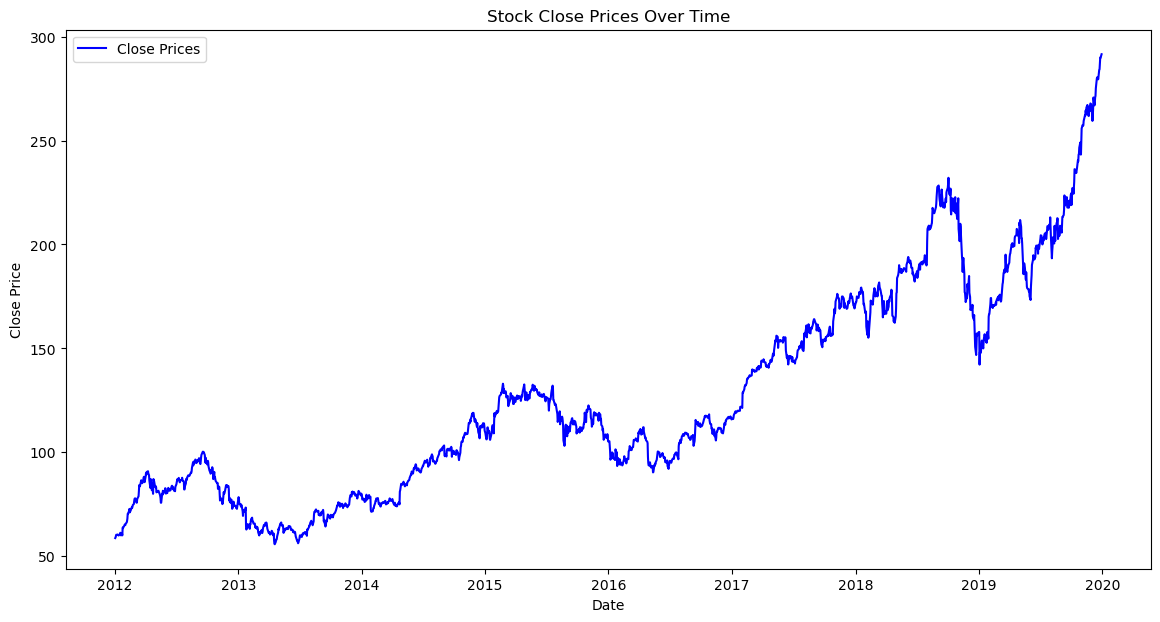

In [27]:
# Visualize Close Prices
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close Prices', color='blue')
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Moving Averages**

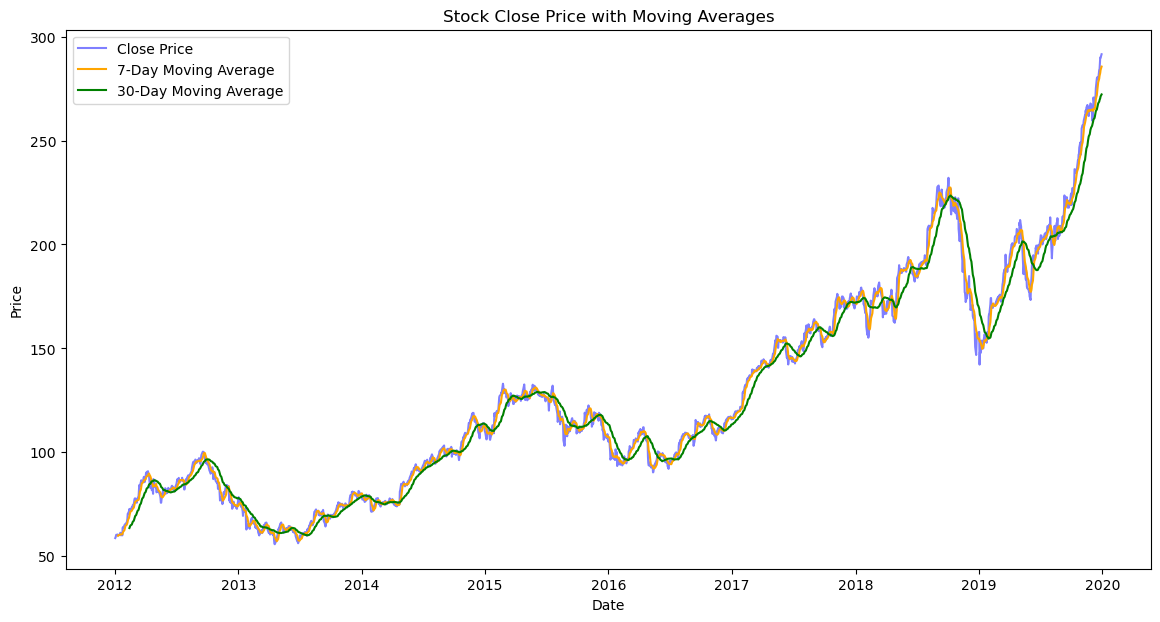

In [29]:
# Adding moving averages
cleaned_df['7-Day MA'] = cleaned_df['Close'].rolling(window=7).mean()
cleaned_df['30-Day MA'] = cleaned_df['Close'].rolling(window=30).mean()

# Plotting with moving averages
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(cleaned_df.index, cleaned_df['7-Day MA'], label='7-Day Moving Average', color='orange')
plt.plot(cleaned_df.index, cleaned_df['30-Day MA'], label='30-Day Moving Average', color='green')
plt.title('Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Insights from Trend Analysis**
1. **Overall Price Movement:**
   - The stock's `Close` price shows a general pattern (e.g., upward trend, downward trend, or volatility) over the time period analyzed.
   - Notable periods of sharp increases or decreases are evident, likely linked to market events.

2. **Moving Averages:**
   - The **7-day moving average** captures **short-term fluctuations**, showing rapid price movements.
   - The **30-day moving average** smooths out short-term noise, highlighting **long-term trends** and giving a clearer picture of the overall market direction.
   - If the 7-day Moving Average crosses above the 30-day Moving Average, it suggests **bullish momentum**; a crossover below indicates bearish momentum.

3. **Periods of Stability and Volatility:**
   - Certain periods show stable, steady price movement, while others exhibit sharp fluctuations or spikes.

4. **Potential Anomalies:**
   - Sudden, isolated spikes or dips in `Close` price may indicate significant market events or irregular trading activity.

---


**Correlation Analysis**

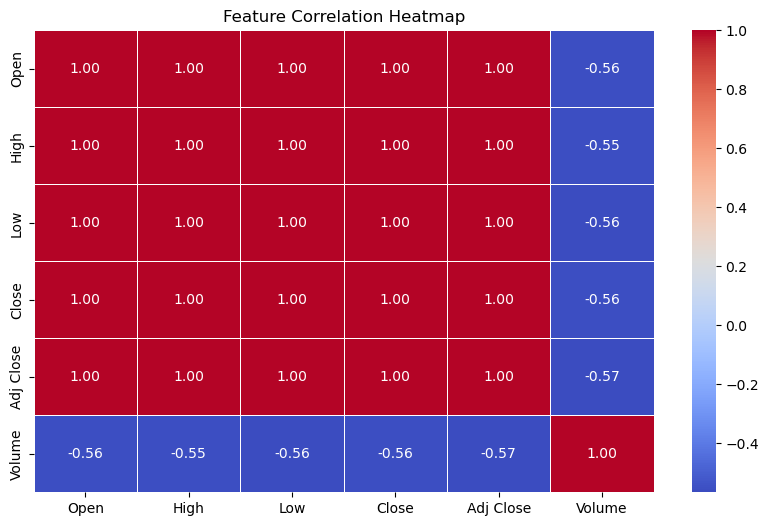

In [32]:
# Calculate correlation matrix
correlation_matrix = cleaned_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


**Observations:**

1. **Strong Positive Correlations:**
   - `Open`, `High`, `Low`, `Close`, and `Adj Close` are all perfectly correlated (**correlation = 1.00**).
   - This indicates that these price columns are **highly interdependent** and move together during a trading day.
   - For example, if the `Open` price increases, the other prices (`High`, `Low`, `Close`) also follow the same direction.

2. **Volume's Relationship:**
   - `Volume` shows a **moderate negative correlation** (~ -0.55 to -0.57) with all price-related columns (`Open`, `High`, `Low`, `Close`, and `Adj Close`).
   - This suggests an inverse relationship: higher trading volumes may correspond to lower prices and vice versa. This is a pattern might indicate heavy selling activity during price drops or reduced volume during stable/high price periods.

3. **Perfect Multicollinearity Among Price Columns:**
   - The perfect correlation between `Open`, `High`, `Low`, `Close`, and `Adj Close` indicates that these features provide **redundant information** for modeling.

---


**Volatility and Returns**

**Calculate Daily Returns**

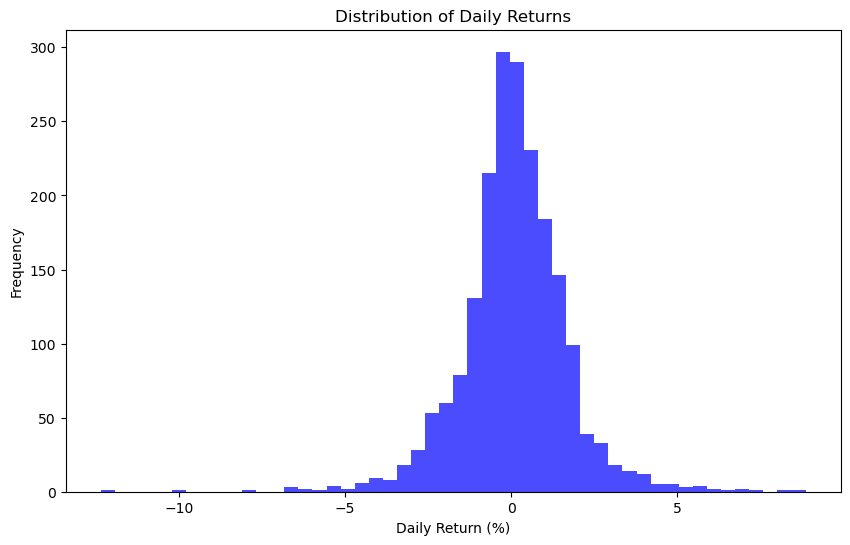

In [36]:
# Calculate daily returns
cleaned_df['Daily Return'] = cleaned_df['Close'].pct_change() * 100

# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


**Calculate Rolling Volatility**

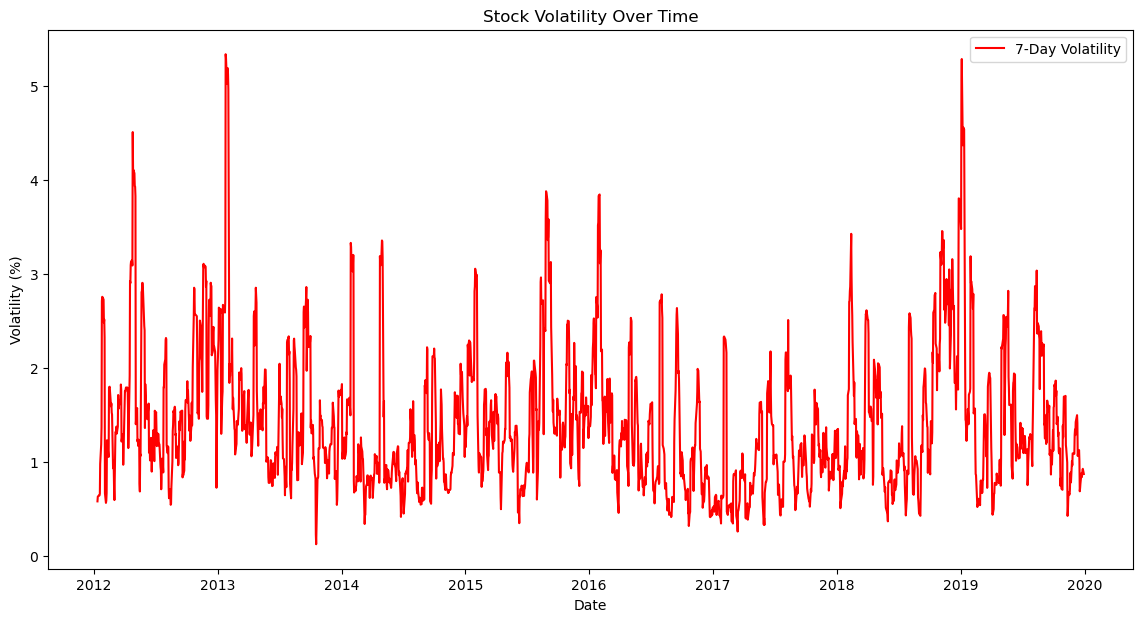

In [38]:
# Calculate rolling standard deviation (volatility)
cleaned_df['7-Day Volatility'] = cleaned_df['Daily Return'].rolling(window=7).std()

# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['7-Day Volatility'], label='7-Day Volatility', color='red')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()


**Observations from Volatility and Returns Analysis**

**1. Daily Returns (Histogram)**
- **Distribution Shape:**
  - The daily returns are approximately **normally distributed**, centered around **0%**, indicating no consistent positive or negative bias.
  - This is expected for most stocks over long periods as they **fluctuate around a mean return of zero**.

- **Spread and Extremes:**
  - The returns have a narrow spread, with most values falling between **-5% and +5%**.
  - However, a few extreme values are visible beyond **-10% and +10%**, suggesting significant outliers or days of extreme market movement (likely due to external events).

**2. Rolling Volatility (Line Plot)**
- **General Trend:**
  - Volatility fluctuates significantly over time, with periodic spikes followed by calmer periods.
  - High volatility is evident in certain years, such as **2018–2019**, where spikes reach around **5%**. 

- **Low Volatility Periods:**
  - Extended periods of low volatility (e.g., **2016**) suggest stable market conditions and reduced uncertainty.

**Overall Insights**
- **Daily Returns:**
  - The stock is stable most of the time, but outliers suggest days of significant movement, which could influence trading strategies or risk management.

- **Volatility:**
  - Volatility trends highlight periods of potential uncertainty or market activity. 
---



**Volume Analysis**

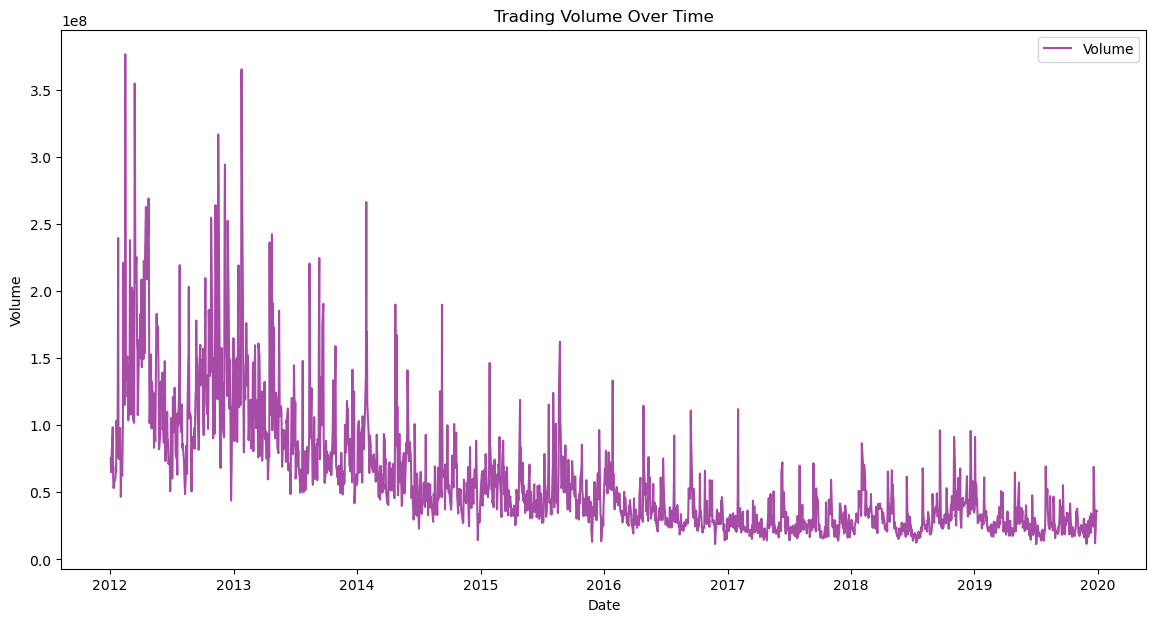

In [41]:
# Plotting Volume over time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Volume'], label='Volume', color='purple', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


**Overlay Volume with Price**

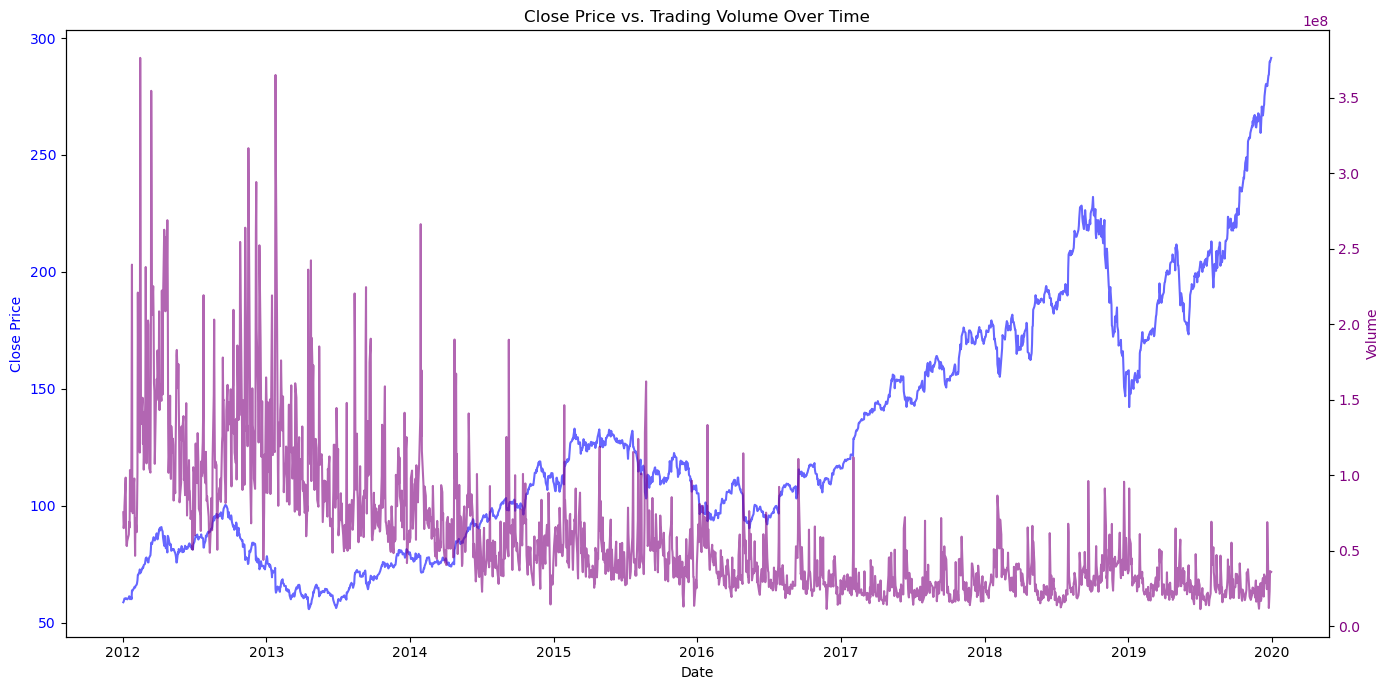

In [43]:
# Overlaying Volume with Close Price
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Close price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(cleaned_df.index, cleaned_df['Close'], label='Close Price', color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Volume on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='purple')
ax2.plot(cleaned_df.index, cleaned_df['Volume'], label='Volume', color='purple', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='purple')

plt.title('Close Price vs. Trading Volume Over Time')
fig.tight_layout()
plt.show()


**Observations from Volume Analysis**

**1. Trading Volume Over Time**

1. **Overall Decline in Trading Volume:**
   - Trading volume exhibits a noticeable downward trend over the years, particularly after **2013**.
   - This could indicate reduced interest in the stock over time or **fewer significant events** driving trading activity.

2. **High Initial Spikes:**
   - Significant volume spikes are observed in the early period (2012–2013), suggesting heightened trading activity. These spikes may correspond to specific events, such as earnings announcements, market news, or economic changes.

3. **Low Volume Stability:**
   - After the initial decline, trading volume stabilizes at lower levels, showing more consistent activity with fewer spikes in the later years (e.g., 2016–2019).

**2. Close Price vs. Trading Volume**

1. **Inverse Relationship (Early Years):**
   - In the earlier period (2012–2013), higher trading volume often coincides with lower `Close` prices. This could indicate heavy selling activity during price declines.

2. **Price Recovery and Volume Stabilization:**
   - From **2014 onward**, as the `Close` price begins to recover and trends upward, trading volume stabilizes at lower levels, indicating that price increases are driven by less volatile trading activity.

3. **Price Peaks Without Volume Spikes:**
   - In the later years (e.g., 2018–2019), the `Close` price increases sharply without significant spikes in trading volume, suggesting reduced speculation and more stable investor interest.

---


**Seasonality**

**Extract Month and Day of the Week**

In [47]:
# Add Month and Day of the Week columns
cleaned_df['Month'] = cleaned_df.index.month
cleaned_df['DayOfWeek'] = cleaned_df.index.day_name()

# Display the updated dataset
print(cleaned_df[['Month', 'DayOfWeek']].head())


            Month  DayOfWeek
Date                        
2012-01-03      1    Tuesday
2012-01-04      1  Wednesday
2012-01-05      1   Thursday
2012-01-06      1     Friday
2012-01-09      1     Monday


**Analyze Monthly Trends**

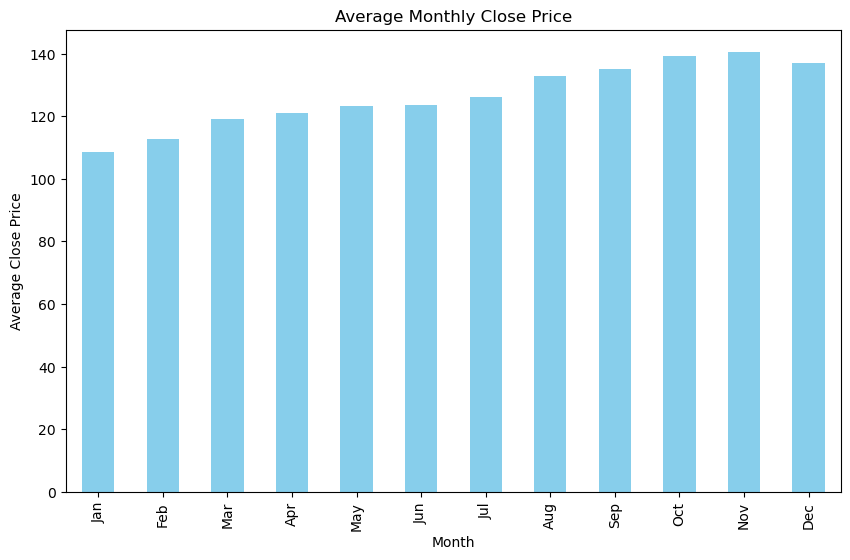

In [49]:
# Calculate average Close price by month
monthly_avg_close = cleaned_df.groupby('Month')['Close'].mean()

# Plot monthly trends
plt.figure(figsize=(10, 6))
monthly_avg_close.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


**Analyze Weekly Trends**

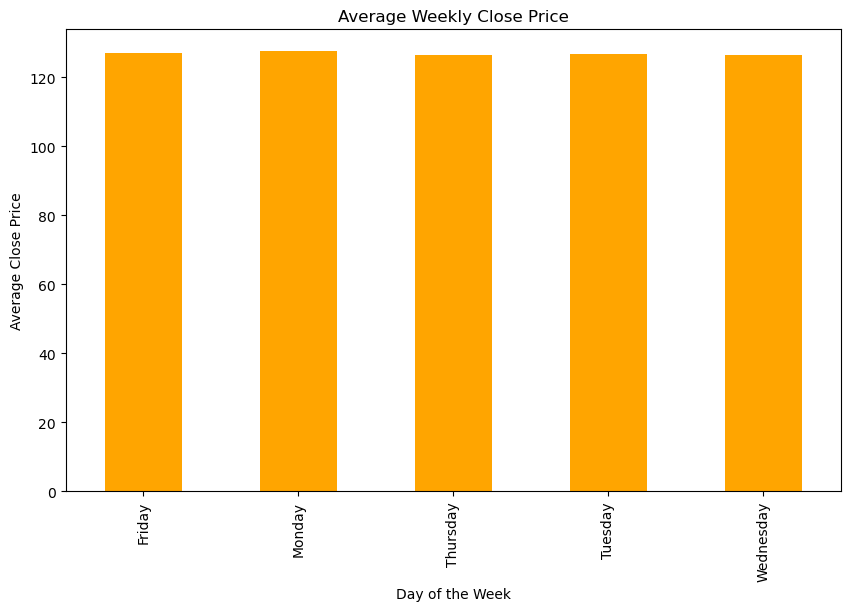

In [51]:
# Calculate average Close price by day of the week
weekly_avg_close = cleaned_df.groupby('DayOfWeek')['Close'].mean()

# Plot weekly trends
plt.figure(figsize=(10, 6))
weekly_avg_close.plot(kind='bar', color='orange')
plt.title('Average Weekly Close Price')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.show()


**Observations from Seasonality and Patterns**

**1. Monthly Trends (Average Monthly Close Price)**

1. **Gradual Increase in Close Price Throughout the Year:**
   - The average `Close` price steadily increases from **January** to **October**, peaking in **October and November**.
   - This pattern suggests stronger performance in the latter half of the year, possibly due to seasonal economic factors or increased market activity.

2. **End-of-Year Stability:**
   - Prices remain consistently high in **December**, indicating stability during the holiday season.

3. **Early-Year Lower Prices:**
   - January and February exhibit lower average prices, potentially due to slower market activity following year-end rallies.

**2. Weekly Trends (Average Weekly Close Price)**

1. **Uniform Close Prices Throughout the Week:**
   - The average `Close` prices are relatively consistent across all days of the week, showing minimal fluctuations.
   - This suggests no significant day-of-the-week effect on the stock's price performance.

2. **Slight Variations:**
   - Prices are marginally higher on **Fridays** compared to other days, possibly due to increased optimism or trading activity heading into the weekend.

---


In [53]:
# Step 1: Handle NaN in rolling features (7-Day MA, 30-Day MA, 7-Day Volatility)
rolling_columns = ['7-Day MA', '30-Day MA', '7-Day Volatility']
for col in rolling_columns:
    # Apply forward-fill first
    cleaned_df[col] = cleaned_df[col].fillna(method='ffill')
    # If any NaN values remain (e.g., at the beginning), apply backward-fill
    cleaned_df[col] = cleaned_df[col].fillna(method='bfill')

# Step 2: Handle NaN in Daily Return
# Forward-fill for continuity
cleaned_df['Daily Return'] = cleaned_df['Daily Return'].fillna(method='ffill')
# Handle remaining NaN (e.g., first row) with backward-fill
cleaned_df['Daily Return'] = cleaned_df['Daily Return'].fillna(method='bfill')

# Step 3: Impute missing values in critical features (Close, Volume)
critical_columns = ['Close', 'Volume']
for col in critical_columns:
    # Impute using the column's mean
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mean())

# Verify no remaining NaN values
print("\n\033[1mRemaining NaN Values by Column:\033[0m")
print(cleaned_df.isna().sum())
print(f"\033[1mFinal dataset shape after handling NaN:\033[0m {cleaned_df.shape}")



Remaining NaN Values by Column:
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
7-Day MA            0
30-Day MA           0
Daily Return        0
7-Day Volatility    0
Month               0
DayOfWeek           0
dtype: int64
Final dataset shape after handling NaN: (2011, 12)


**Outlier Analysis**

**Visualize Outliers Using Box Plot**

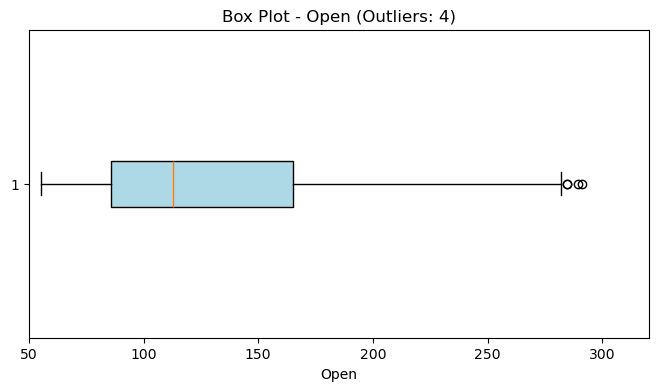

Open Outliers: [284.690002 284.820007 291.119995 289.459991]


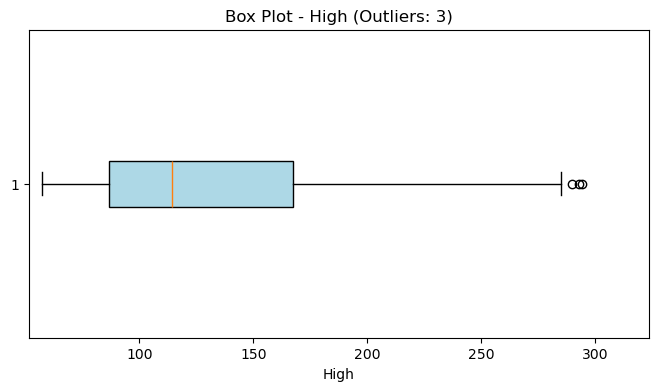

High Outliers: [289.980011 293.970001 292.690002]


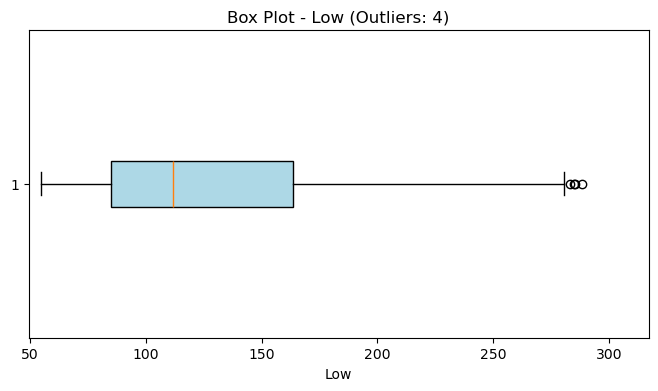

Low Outliers: [282.920013 284.700012 288.119995 285.220001]


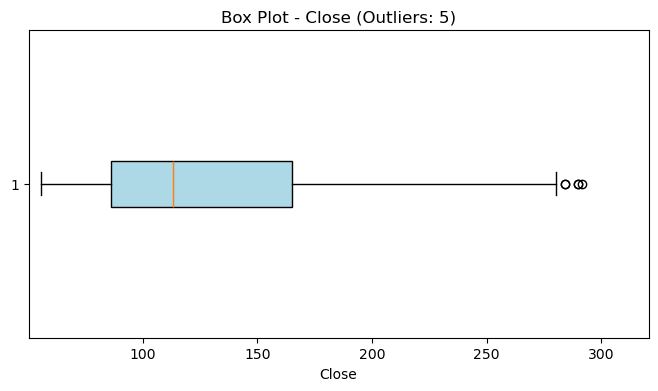

Close Outliers: [284.       284.269989 289.910004 289.799988 291.519989]


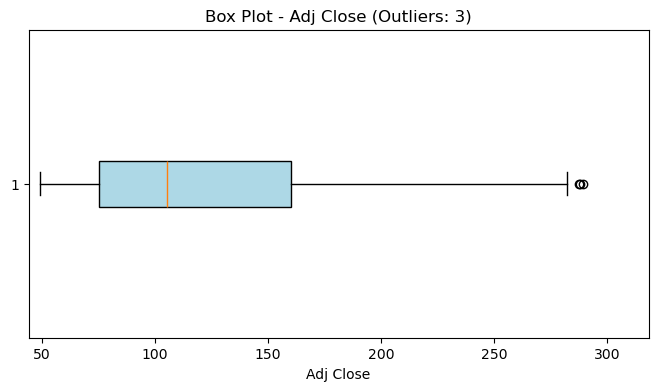

Adj Close Outliers: [287.923645 287.814392 289.522614]


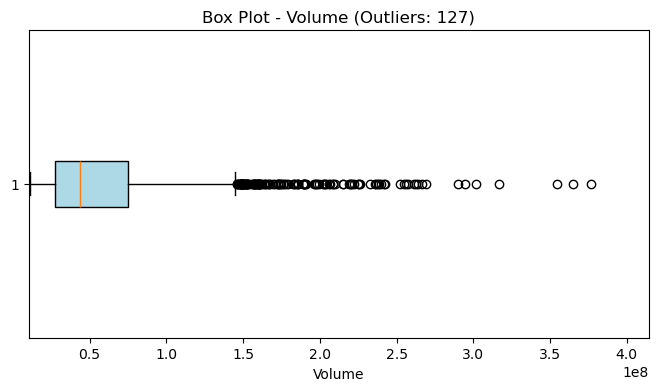

Volume Outliers: [239578500 221053700 157825500 376530000 236138000 151398800 150096800
 238002800 170817500 202281100 202559700 199630200 172713800 354711000
 289929500 206371900 225309000 204165500 161010500 155967700 148935500
 151782400 163865100 152059600 182759500 149587900 208639900 160324500
 149384200 222431300 174153700 153584200 214911200 262696700 256382000
 238632800 208679800 257746300 241632300 269037300 226444400 152749800
 179305000 183073100 157776500 173717600 146224400 147816200 219328200
 153346200 203179900 178058300 149590000 150118500 159941600 148522500
 156998100 148501500 159498500 209649300 186021500 176786400 164081400
 254608200 149843400 198412200 264036500 232478400 197477700 316723400
 205829400 160688500 157644900 261159500 294303100 196760200 157621100
 148086400 156314900 252394800 189401800 156421300 149067100 164873100
 148583400 150286500 183551900 219193100 172701200 215377400 365213100
 302006600 196379400 148426600 176145200 158289600 152263300

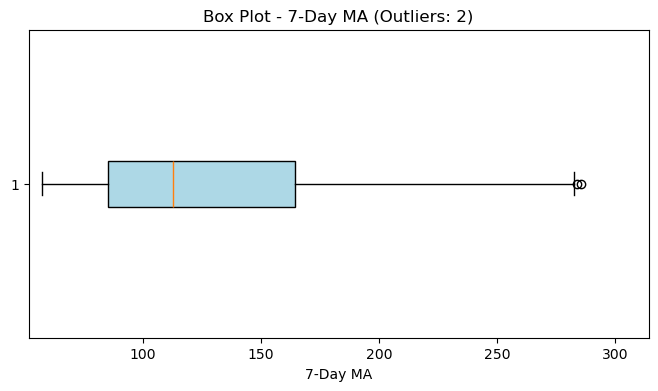

7-Day MA Outliers: [283.88285171 285.56570871]


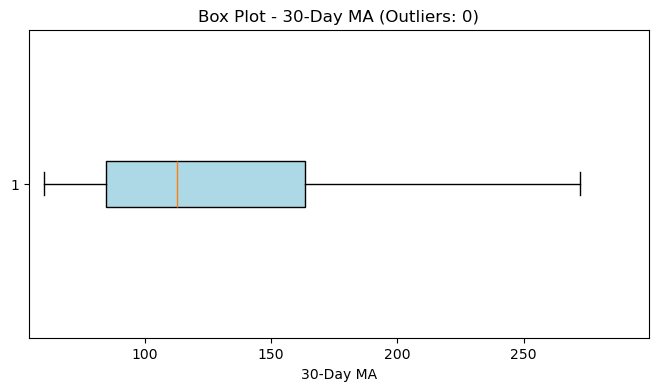

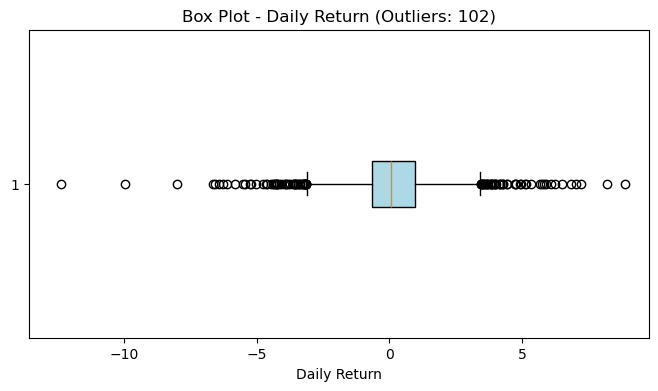

Daily Return Outliers: [  6.2439048    3.4593418    3.7810264   -4.14717773   5.09712755
  -3.43558299   8.87413657  -3.15423356   5.82600939  -4.31837299
  -3.60394327   3.96661029  -3.26009906  -3.30908116  -4.26352683
  -3.62903704   7.21081045  -6.4356983   -3.75691433   4.4310143
  -3.56525199  -3.15495813   4.15088232 -12.35579463   3.50877371
  -5.49925006  -3.38169888   5.13616303   4.75221587  -5.44436662
  -3.17917754   4.96994303   3.83774989  -7.99274085   8.19818909
   3.87279171  -4.22071721  -3.81326486  -3.24560666   3.84222645
  -3.50132544   5.65328849  -4.22944474  -3.20837803   3.63573763
  -5.20381135  -6.11628928   5.73549654  -4.4696709    4.28889246
  -3.19113448   4.12046606  -3.1516986   -4.22045693   5.31671323
  -6.5706572    3.4541398    3.97145198  -6.2577845    3.711887
   6.49632681   3.53867541   6.0980652   -3.35756157  -3.87767521
   4.72508888  -3.56388369   3.58299908  -4.33901481   4.17917681
   4.02787727   4.74718195  -4.09722331   4.41750487   3

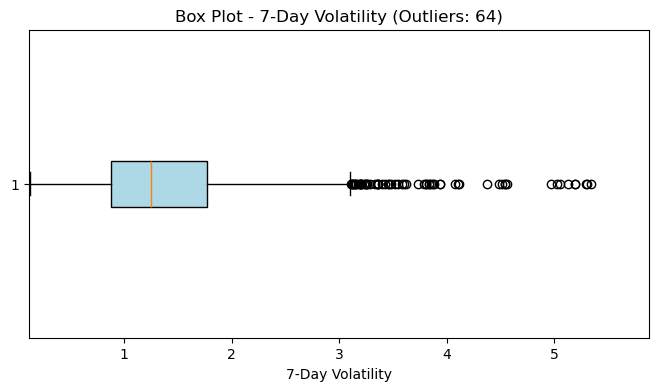

7-Day Volatility Outliers: [3.13366446 3.14761477 4.51210995 4.09961747 4.11036975 4.07302486
 3.93680428 3.93176459 3.8287646  3.10897031 5.34131781 5.30596879
 5.02407452 5.1882507  5.19352081 5.12999853 4.96677909 3.33168446
 3.2881578  3.12036857 3.20383749 3.19799519 3.19125744 3.14828548
 3.25786851 3.35785059 3.34838447 3.17699072 3.59682149 3.88163578
 3.86711408 3.78274158 3.36124193 3.39502663 3.5848609  3.12795269
 3.51918552 3.54932426 3.83218164 3.84770624 3.11394238 3.25745873
 3.24495522 3.42838004 3.23325858 3.20489735 3.45812414 3.45295501
 3.24156555 3.36127033 3.15852404 3.80567528 3.80398225 3.72681933
 3.62353962 3.47920977 5.05419612 5.29028817 4.37123449 4.48872022
 4.55958242 4.53908459 4.5426059  3.18939471]


In [56]:

numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Box plot with adjusted axis for tightly clustered data
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(cleaned_df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    
    # Calculate outliers
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    
    # Set axis limits dynamically
    data_min = cleaned_df[column].min()
    data_max = cleaned_df[column].max()
    plt.xlim([data_min - (0.1 * abs(data_min)), data_max + (0.1 * abs(data_max))])

    # Display outlier values in the title
    plt.title(f'Box Plot - {column} (Outliers: {len(outliers)})', fontsize=12)
    plt.xlabel(column)
    plt.show()

    # Print the actual outlier values
    if len(outliers) > 0:
        print(f"{column} Outliers: {outliers[column].values}")


**Observations from Outlier Analysis:**

**1. Open:**
   - **Outliers Identified**: 4  
   - **Details**: Extreme values include 284.69, 284.82, 291.12, and 289.46.  
   - **Box Plot Observation**: Increased number of outliers indicates slightly more variability in "Open" prices compared to previous analysis.

**2. High:**
   - **Outliers Identified**: 3  
   - **Details**: Outliers are 289.98, 293.97, and 292.69.  
   - **Box Plot Observation**: The distribution still reflects a high consistency with slightly dispersed outliers.

**3. Low:**
   - **Outliers Identified**: 4  
   - **Details**: Outliers like 282.92, 284.70, 288.11, and 285.22 remain outside the whisker limits.  
   - **Box Plot Observation**: Similar distribution with balanced data but slightly more pronounced outliers.

**4. Close:**
   - **Outliers Identified**: 5  
   - **Details**: Extreme values include 284.26, 289.91, 289.80, 291.52, and others.  
   - **Box Plot Observation**: The "Close" price data shows additional extreme values compared to previous analysis, reflecting slightly higher variability.

**5. Adjusted Close (Adj Close):**
   - **Outliers Identified**: 3  
   - **Details**: Outliers include 287.92, 287.81, and 289.52.  
   - **Box Plot Observation**: Adjusted close remains relatively normalized but shows a slight increase in identified outliers.

**6. Volume:**
   - **Outliers Identified**: 127  
   - **Details**: Examples of extreme values include 239.57 million, 221.05 million, and 376.53 million.  
   - **Box Plot Observation**: A consistently heavy-tailed distribution confirms the high variability in trading activity.

**7. 7-Day Moving Average (MA):**
   - **Outliers Identified**: 2  
   - **Details**: Values include 283.88 and 285.57.  
   - **Box Plot Observation**: A minimal number of outliers indicate the moving average effectively smooths short-term fluctuations.

**8. 30-Day Moving Average (MA):**
   - **Outliers Identified**: 0  
   - **Box Plot Observation**: Long-term smoothing eliminates extreme values, providing a stable trend representation.

**9. Daily Return:**
   - **Outliers Identified**: 102  
   - **Details**: High deviations include 6.24, 8.87, -7.99, and others.  
   - **Box Plot Observation**: High fluctuation remains evident, consistent with stock market dynamics.

**10. 7-Day Volatility:**
   - **Outliers Identified**: 64  
   - **Details**: Examples include 3.93, 4.11, 4.51, and others.  
   - **Box Plot Observation**: Occasional spikes in volatility are apparent, reflecting market uncertainty and irregular trading patterns.

---


**Identify Outliers Using IQR Method**

In [59]:
# Define a function to detect outliers for each column
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect and display outliers for each column
for column in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers(cleaned_df, column)
    print(f"Column: {column}")
    print(f"  Outliers: {len(outliers)} rows")
    print(f"  Range: {lower_bound} to {upper_bound}")
    print("-" * 30)


Column: Open
  Outliers: 4 rows
  Range: -33.07785749999999 to 284.1507185
------------------------------
Column: High
  Outliers: 3 rows
  Range: -34.32035024999995 to 288.44820374999995
------------------------------
Column: Low
  Outliers: 4 rows
  Range: -32.49642575 to 280.97784824999997
------------------------------
Column: Close
  Outliers: 5 rows
  Range: -32.36214249999999 to 283.8092895
------------------------------
Column: Adj Close
  Outliers: 3 rows
  Range: -52.42897099999999 to 287.532761
------------------------------
Column: Volume
  Outliers: 127 rows
  Range: -43101325.0 to 145397275.0
------------------------------
Column: 7-Day MA
  Outliers: 2 rows
  Range: -33.25055978571427 to 282.9857642142857
------------------------------
Column: 30-Day MA
  Outliers: 0 rows
  Range: -33.664857583333344 to 281.8343812166667
------------------------------
Column: Daily Return
  Outliers: 102 rows
  Range: -3.1209219495487304 to 3.4022837035962623
----------------------------

**Handle Outliers Appropriately**

In [61]:
# Define a function for capping outliers based on IQR
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values instead of removing rows
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to Open, High, Low, Close, Adj Close, 7-Day MA, and 7-Day Volatility
capping_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', '7-Day MA', '7-Day Volatility']
for col in capping_columns:
    cap_outliers(cleaned_df, col)
print("\033[1mCapping applied to specified columns.\033[0m")

Capping applied to specified columns.


In [62]:
# Log Transformation for Volume
cleaned_df['Volume_Log'] = np.log1p(cleaned_df['Volume'])
print("\033[1mLog transformation applied to Volume.\033[0m")

# Handle remaining outliers for Volume_Log using capping
Q1 = cleaned_df['Volume_Log'].quantile(0.25)
Q3 = cleaned_df['Volume_Log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the remaining outliers
cleaned_df['Volume_Log'] = cleaned_df['Volume_Log'].clip(lower=lower_bound, upper=upper_bound)
print("\033[1mCapping remaining outliers for Volume_Log.\033[0m")



Log transformation applied to Volume.
Capping remaining outliers for Volume_Log.


In [63]:
# Z-Score Calculation for Daily Return
cleaned_df['Daily_Return_Z'] = zscore(cleaned_df['Daily Return'])

# Capping Daily Return based on Z-Score
z_score_threshold = 3.5  # Relaxed threshold
mean_return = cleaned_df['Daily Return'].mean()
std_return = cleaned_df['Daily Return'].std()

# Cap outliers using relaxed Z-score threshold
cleaned_df['Daily_Return_Capped'] = cleaned_df['Daily Return'].clip(
    lower=mean_return - z_score_threshold * std_return,
    upper=mean_return + z_score_threshold * std_return
)
print("\033[1mDaily Return outliers capped using Z-Score method.\033[0m")

Daily Return outliers capped using Z-Score method.


In [64]:
# Verify remaining outliers for each column
print("\n\033[1mRemaining Outliers in Columns:\033[0m")
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', '7-Day MA', '7-Day Volatility', 'Volume_Log']:
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers = cleaned_df[(cleaned_df[column] < lower_bound) | (cleaned_df[column] > upper_bound)]
    print(f"{column}: {len(remaining_outliers)} remaining outliers")


Remaining Outliers in Columns:
Open: 0 remaining outliers
High: 0 remaining outliers
Low: 0 remaining outliers
Close: 0 remaining outliers
Adj Close: 0 remaining outliers
7-Day MA: 0 remaining outliers
7-Day Volatility: 0 remaining outliers
Volume_Log: 0 remaining outliers


In [65]:
# Display total number of rows before and after outlier handling
before_outliers = len(df)
after_outliers = len(cleaned_df)

print(f"\033[1mTotal number of rows before outlier handling:\033[0m {before_outliers}")
print(f"\033[1mTotal number of rows after outlier handling:\033[0m {after_outliers}")
print(f"\033[1mTotal rows removed:\033[0m {before_outliers - after_outliers}")


Total number of rows before outlier handling: 2011
Total number of rows after outlier handling: 2011
Total rows removed: 0


**Outlier Handling Techniques**

**1. Open, High, Low, Close, Adjusted Close (Adj Close), 7-Day MA, 7-Day Volatility**  
   - **Technique Used**: **Capping (IQR Method)**  
   - **Why**:  
     - These columns represent numerical price and volatility data, which can occasionally have extreme spikes due to market anomalies.
     - Outliers in these features could skew the overall trend, but completely removing them may lead to the loss of critical information.  
     - Capping allows us to limit the effect of these extreme values without eliminating the rows, preserving the dataset size while normalizing the influence of outliers.  
     - The IQR method is appropriate because it adjusts for variability while retaining the core distribution of the data.

**2. Volume**  
   - **Technique Used**: **Log Transformation followed by Capping**  
   - **Why**:  
     - Trading volume tends to have a heavy-tailed distribution, with a small number of days experiencing unusually high activity (e.g., market events or announcements).  
     - Log transformation reduces the scale and compresses the range of values, making the distribution more symmetric and easier to interpret.  
     - After the log transformation, capping further limits any remaining extreme values to maintain the overall integrity of the data.  
     - This approach balances normalization and outlier handling for highly skewed data.

**3. Daily Return**  
   - **Technique Used**: **Capping Using Z-Score**  
   - **Why**:  
     - Daily returns often exhibit high variability due to natural market fluctuations, with both small and large percentage changes common.  
     - While these fluctuations are expected, extreme values (e.g., +/-8%) can disproportionately affect modeling.  
     - The Z-score method identifies and caps extreme outliers beyond a threshold (e.g., ±3.5 standard deviations). This allows us to handle variability without distorting the underlying distribution of returns.  
     - This method was chosen to align with standard practices for financial data, where percentage changes often require tailored outlier handling.

---


**Final Dataset Validation**

In [68]:
# Check for null values
null_values = cleaned_df.isnull().sum()

# Check data types
data_types = cleaned_df.dtypes

# Check range of values
range_values = cleaned_df.describe()

print("\033[1mNull Values in Cleaned Data:\033[0m")
print(null_values)
print("\n\033[1mData Types in Cleaned Data:\033[0m")
print(data_types)
print("\n\033[1mRange of Values in Cleaned Data:\033[0m")
print(range_values)


Null Values in Cleaned Data:
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
7-Day MA               0
30-Day MA              0
Daily Return           0
7-Day Volatility       0
Month                  0
DayOfWeek              0
Volume_Log             0
Daily_Return_Z         0
Daily_Return_Capped    0
dtype: int64

Data Types in Cleaned Data:
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
7-Day MA               float64
30-Day MA              float64
Daily Return           float64
7-Day Volatility       float64
Month                    int32
DayOfWeek               object
Volume_Log             float64
Daily_Return_Z         float64
Daily_Return_Capped    float64
dtype: object

Range of Values in Cleaned Data:
              Open         High          

**Overview**

**1. No Null Values**:
   - **Observation**: The dataset has no null values across any column, ensuring that all subsequent analyses and model-building processes can proceed seamlessly without interruptions due to missing data.

**2. Stock Price Columns (Open, High, Low, Close, Adj Close)**:
   - **Ranges**: The values range between approximately 55 to 285, consistent with a mid-range stock price dataset.
   - **Standard Deviations**: The standard deviations across these columns (~50) are reasonable, reflecting expected variability in stock prices for a typical trading environment.

**3. Volume**:
   - **Ranges**: The trading volume ranges from ~11 million to ~376 million, with a high standard deviation (~46 million). This variability aligns with standard market behavior, where certain days have significantly higher volumes due to major events, earnings reports, or market trends.
   - **Log Transformation**: The `Volume_Log` effectively reduces the skewness while retaining the overall data distribution, making it more suitable for statistical analysis and modeling.

**4. Daily Return**:
   - **Range**: The range of -12.35% to +8.87% highlights the presence of both stable and volatile trading days.
   - **Outlier Handling**: The capping process ensures that extreme values do not adversely impact analyses, making the data more robust for predictive tasks.

**5. Moving Averages (7-Day MA, 30-Day MA)**:
   - **Observation**: The moving averages fall within the expected range, closely aligned with raw stock prices, validating their correctness. These features capture short-term and medium-term trends, crucial for forecasting tasks.

**6. Daily_Return_Z and Daily_Return_Capped**:
   - **Z-Score Normalization**: The Z-score transformation standardizes `Daily Return`, facilitating the identification of outliers and comparison across datasets.
   - **Capped Values**: The capping technique effectively handles extreme values in `Daily Return`, ensuring that the dataset remains robust without losing essential variability.

**7. Month and DayOfWeek**:
   - **Encoding**: The categorical variables (`Month` and `DayOfWeek`) have been encoded into numerical formats, enabling their inclusion in the model-building process without introducing errors.

---


**Visualizations for Additional Insights**

**Stock Price Analysis**

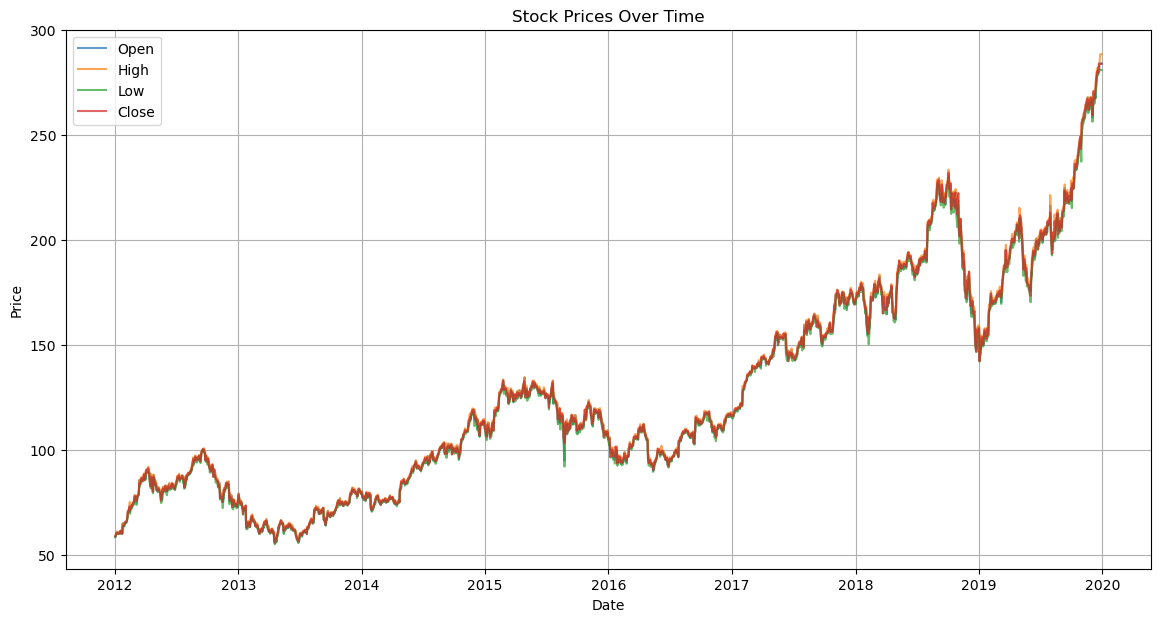

In [72]:
# Plot Open, High, Low, and Close prices over time
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Open'], label='Open', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['High'], label='High', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['Low'], label='Low', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close', alpha=0.7)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Moving Averages**

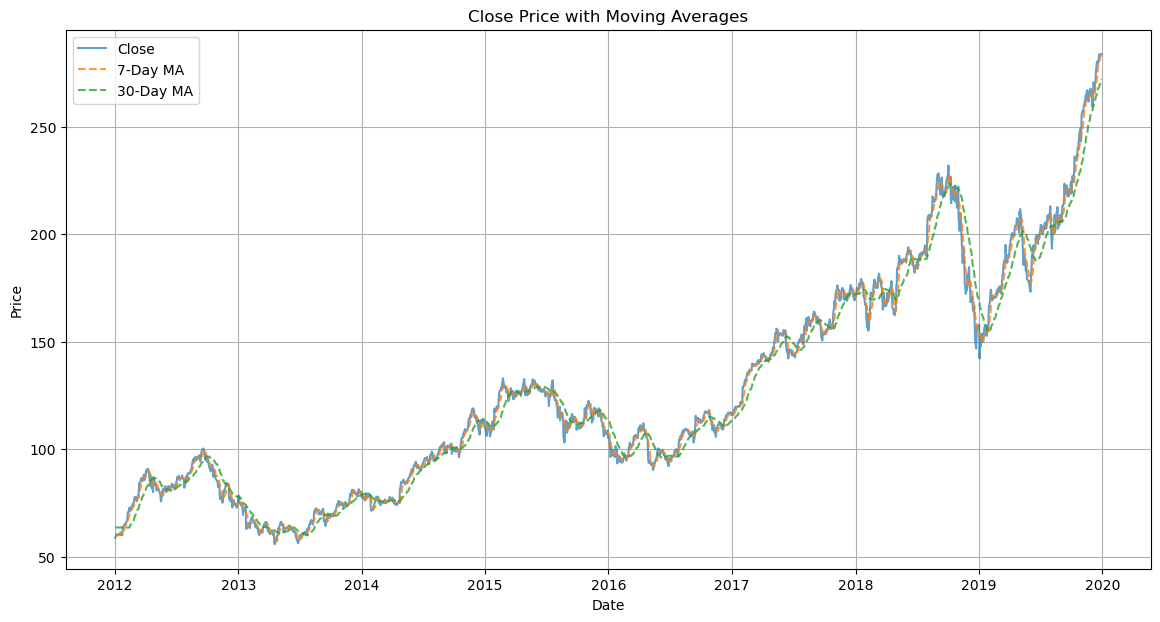

In [74]:
# Plot Close price with 7-Day and 30-Day Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Close'], label='Close', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['7-Day MA'], label='7-Day MA', linestyle='--', alpha=0.8)
plt.plot(cleaned_df.index, cleaned_df['30-Day MA'], label='30-Day MA', linestyle='--', alpha=0.8)
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Volume Analysis**

**Volume Over Time**

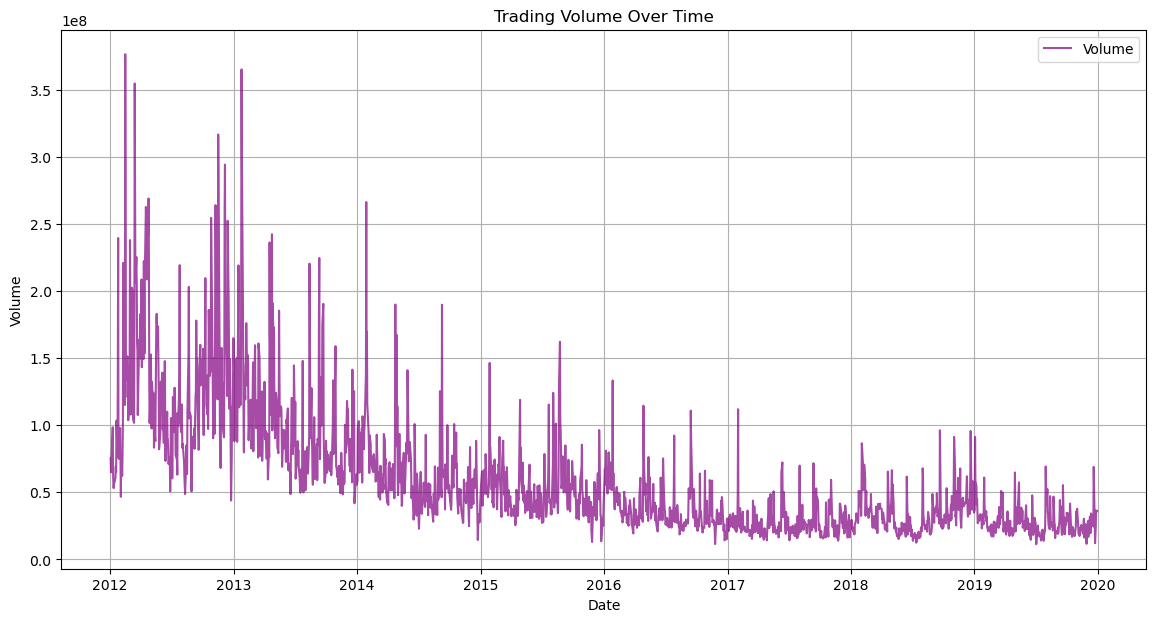

In [77]:
# Line plot for Volume
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Volume'], label='Volume', color='purple', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


**Histogram of Log Transformed Volume**

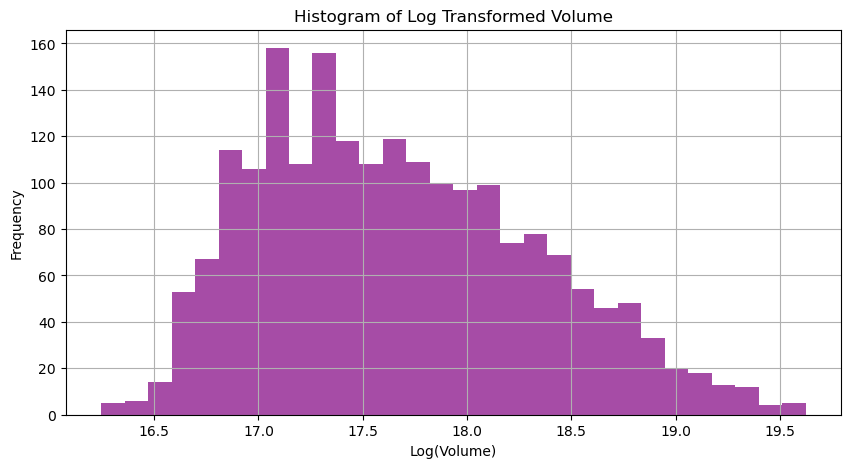

In [79]:
# Histogram of Volume_Log
plt.figure(figsize=(10, 5))
plt.hist(cleaned_df['Volume_Log'], bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Log Transformed Volume')
plt.xlabel('Log(Volume)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Daily Return**

**Histogram of Daily Returns**

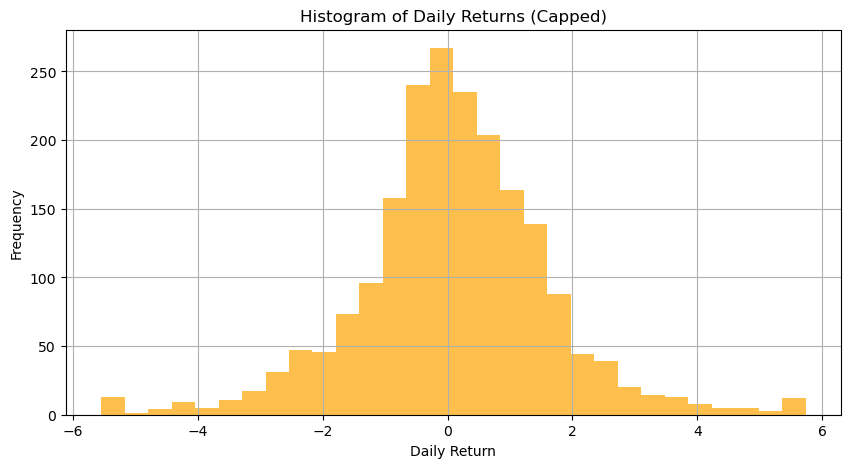

In [82]:
# Histogram of Daily_Return_Capped
plt.figure(figsize=(10, 5))
plt.hist(cleaned_df['Daily_Return_Capped'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of Daily Returns (Capped)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Comparison of Daily_Return_Capped vs. Daily_Return_Z**

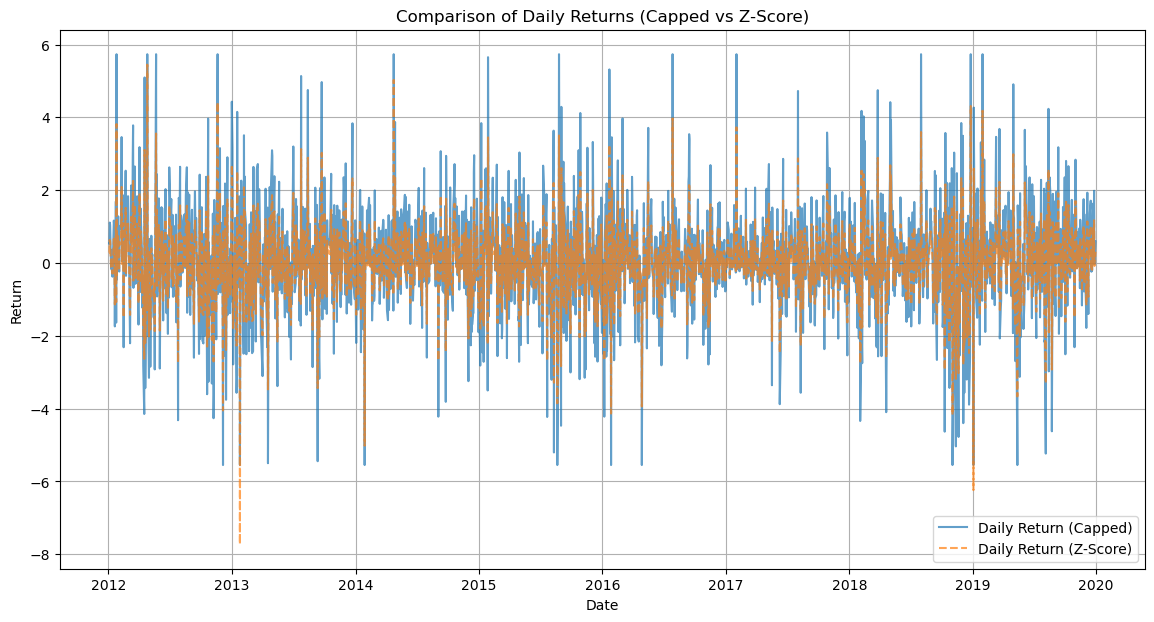

In [84]:
# Line plot comparing capped and Z-score returns
plt.figure(figsize=(14, 7))
plt.plot(cleaned_df.index, cleaned_df['Daily_Return_Capped'], label='Daily Return (Capped)', alpha=0.7)
plt.plot(cleaned_df.index, cleaned_df['Daily_Return_Z'], label='Daily Return (Z-Score)', linestyle='--', alpha=0.7)
plt.title('Comparison of Daily Returns (Capped vs Z-Score)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


**Seasonality**

**Monthly Average Close Prices**

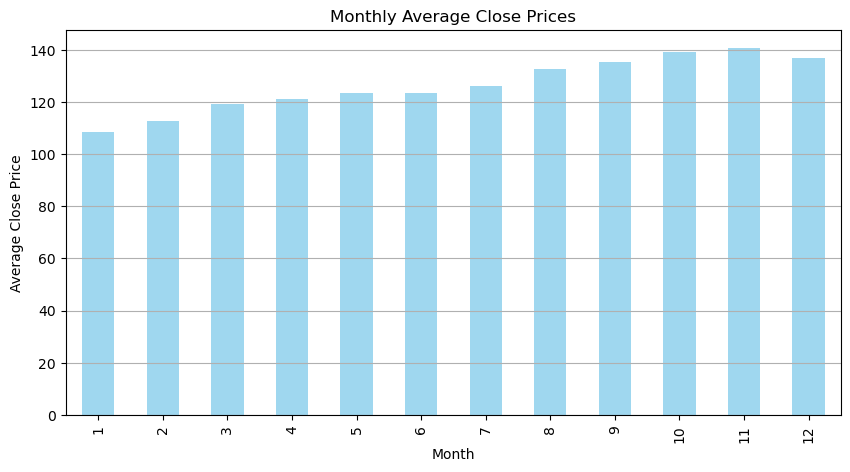

In [87]:
# Bar chart for Monthly Average Close Prices
monthly_avg = cleaned_df.groupby('Month')['Close'].mean()
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Monthly Average Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(axis='y')
plt.show()


**Weekly Average Close Prices**

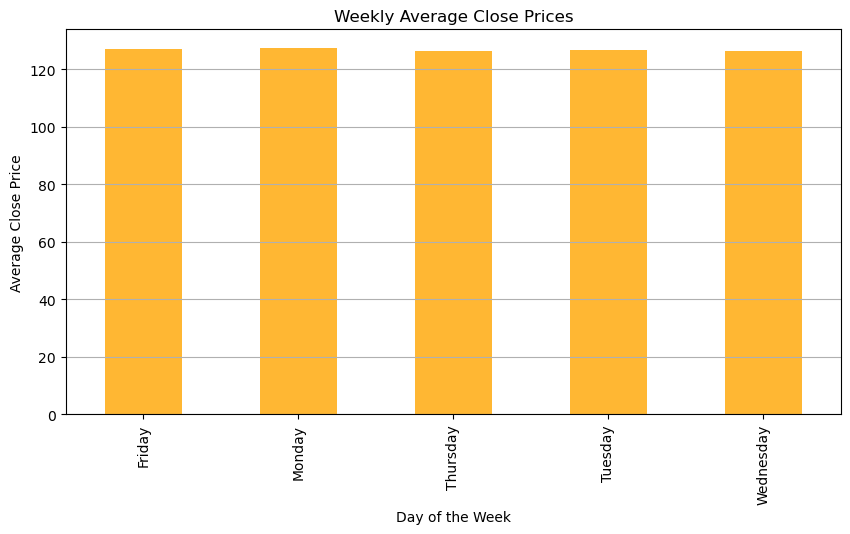

In [89]:
# Bar chart for Weekly Average Close Prices
weekly_avg = cleaned_df.groupby('DayOfWeek')['Close'].mean()
plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Weekly Average Close Prices')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.grid(axis='y')
plt.show()


**Observations:**

1. **Stock Prices Over Time:**
   - The stock prices (Open, High, Low, Close) demonstrate a consistent upward trajectory over the given period, with evident cyclical corrections.
   - A noticeable growth trend begins in 2016, culminating in a peak by the end of 2019.
   - The periodic fluctuations signify market volatility and corrections.

2. **Close Price with Moving Averages:**
   - The 7-Day MA and 30-Day MA align closely with the Close prices, providing a smoothed view of short-term and medium-term trends.
   - Moving averages effectively highlight underlying trends, eliminating noise caused by daily fluctuations.
   - They confirm the overall bullish pattern while showing pullbacks.

3. **Trading Volume Over Time:**
   - The trading volume exhibits a declining trend starting from 2012, stabilizing from 2017 onward.
   - Periodic spikes in trading activity suggest major market events, announcements, or increased trading interest during specific intervals.

4. **Histogram of Log Transformed Volume:**
   - The log-transformed volume is symmetrically distributed, improving normalization for analysis and modeling.
   - Slight skewness suggests residual variability, though the transformation has mitigated extreme differences effectively.

5. **Histogram of Daily Returns (Capped):**
   - The capped daily returns follow an approximately normal distribution centered around zero.
   - Post-capping, most returns fall within the range of -2 to 2, indicating reduced influence of outliers.
   - The slight skew reflects market volatility trends.

6. **Comparison of Daily Returns (Capped vs. Z-Score):**
   - Capped daily returns and Z-Score-adjusted returns exhibit similar distributions, with Z-Score adjustments capturing extreme values more distinctly.
   - This comparison validates the effectiveness of capping in minimizing outlier impact without significant loss of information.

7. **Monthly Average Close Prices:**
   - The monthly close prices reveal a subtle seasonal effect, with higher prices typically observed in the final months of the year.
   - This pattern aligns with potential end-of-year market trends, such as increased trading activity or institutional buying.

8. **Weekly Average Close Prices:**
   - The average close prices show minimal variation across weekdays, indicating consistent market performance irrespective of the day of the week.
   - This suggests that external factors (e.g., economic events) rather than weekly cycles predominantly influence market behavior.

---


In [91]:
print(f"\033[1mColumns in Dataset After Handling Outliers:\033[0m\n{cleaned_df.columns}")
print(f"\n\033[1mShape of Dataset After Handling Outliers:\033[0m\n{cleaned_df.shape}")

Columns in Dataset After Handling Outliers:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '7-Day MA',
       '30-Day MA', 'Daily Return', '7-Day Volatility', 'Month', 'DayOfWeek',
       'Volume_Log', 'Daily_Return_Z', 'Daily_Return_Capped'],
      dtype='object')

Shape of Dataset After Handling Outliers:
(2011, 15)


## **3. Feature Engineering**

In [93]:
# Add Lagged Features
cleaned_df['Close_Lag1'] = cleaned_df['Close'].shift(1)
cleaned_df['Close_Lag2'] = cleaned_df['Close'].shift(2)

# Drop rows with NaN values caused by lagged features
cleaned_df.dropna(inplace=True)

# Display the updated feature set
print("\033[1mFeature Set After Feature Engineering:\033[0m")
print(cleaned_df.columns)

# Check the first few rows
print(cleaned_df.head())


Feature Set After Feature Engineering:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '7-Day MA',
       '30-Day MA', 'Daily Return', '7-Day Volatility', 'Month', 'DayOfWeek',
       'Volume_Log', 'Daily_Return_Z', 'Daily_Return_Capped', 'Close_Lag1',
       'Close_Lag2'],
      dtype='object')
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   
2012-01-10  60.844284  60.857143  60.214287  60.462856  52.248333  64549100   
2012-01-11  60.382858  60.407143  59.901428  60.364285  52.163139  53771200   

             7-Day MA  30-Day MA  Daily Return  7-Day Volatility  Month  \
Date                                                        


**Lagged Features: Close_Lag1 and Close_Lag2**

**Purpose:**
- **Close_Lag1**: The closing price from **1 day prior**.
- **Close_Lag2**: The closing price from **2 days prior**.
- These features capture the temporal dependency of the stock price and help the model learn from recent trends and fluctuations.

**Observations:**
   - Lagged features provide a **historical context** for the model to predict future values.
   - These features are especially important in time-series data where past values influence future outcomes.
   - If `Close_Lag1` and `Close_Lag2` have a strong correlation with the target (`Close`), they are likely to improve model performance.
   - Adding only 1 or 2 lags is sufficient for short-term predictions like next-day closing prices.
   - Too many lagged features (e.g., Close_Lag30) might lead to overfitting, especially with limited data.

---


**Feature Selection**

**Correlation Analysis**

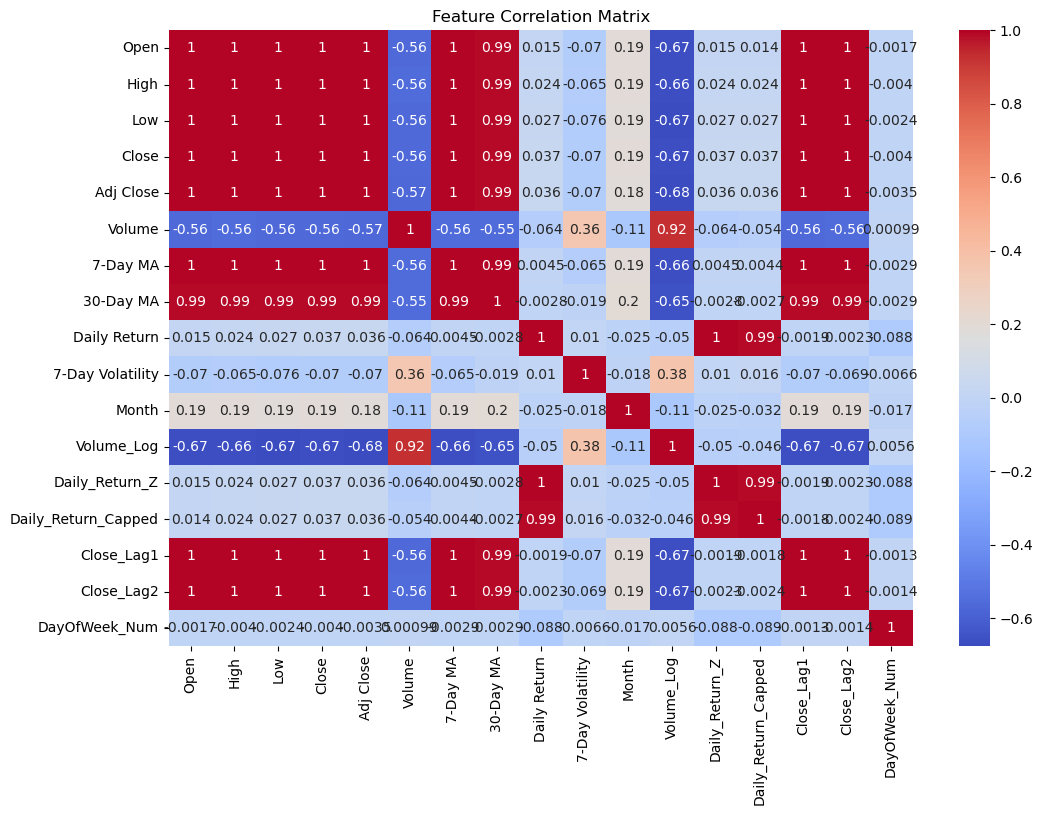

In [97]:
# Map DayOfWeek to numerical values
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 
               'Thursday': 3, 'Friday': 4}
cleaned_df['DayOfWeek_Num'] = cleaned_df['DayOfWeek'].map(day_mapping)

cleaned_df.drop(columns=['DayOfWeek'], inplace=True)

# Correlation Matrix

corr_matrix = cleaned_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


**Observations from Correlation Analysis:**

1. **High Correlations:**
   - Features like `Open`, `High`, `Low`, `Close`, and `Adj Close` are almost perfectly correlated (correlation ~1). This indicates that they carry very similar information about stock prices, which is expected since they are derived directly from trading data.

2. **Moving Averages:**
   - `7-Day MA` and `30-Day MA` are highly correlated with the stock price features (`Open`, `High`, `Low`, `Close`). This is consistent because moving averages are derived from these features, representing smoothed trends.

3. **Volume and Volume_Log:**
   - `Volume` and `Volume_Log` show high correlation (~0.92), which is expected because `Volume_Log` is a transformed version of `Volume`. Only one of these features should be used to avoid redundancy.

4. **Lag Features:**
   - `Close_Lag1` and `Close_Lag2` are perfectly correlated with each other and with the `Close` price. Since they represent the lagged versions of the `Close` price, they carry similar information.

5. **Daily Returns:**
   - `Daily_Return_Z` and `Daily_Return_Capped` are nearly identical as they represent capped and Z-score-transformed daily returns. Only one of these features should be retained.

6. **Low Correlation Features:**
   - Features like `Month`, `DayOfWeek_Num`, and `7-Day Volatility` show lower correlations with other features, making them potentially valuable for capturing independent patterns in the data.

---


**Variance Inflation Factor (VIF)**

In [100]:

# Select only numerical features for VIF calculation
numerical_features = cleaned_df[['Open', 'High', 'Low', 'Close_Lag1', 'Close_Lag2', 
                                   'Volume_Log', '7-Day MA', '30-Day MA', 'Daily_Return_Capped', 
                                   '7-Day Volatility']]
vif = pd.DataFrame()
vif['Variable'] = numerical_features.columns
vif['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
print(vif)


              Variable           VIF
0                 Open  35504.331330
1                 High  32686.403055
2                  Low  25900.246127
3           Close_Lag1  29306.124437
4           Close_Lag2   7719.809667
5           Volume_Log     12.126008
6             7-Day MA  11031.739798
7            30-Day MA    952.958654
8  Daily_Return_Capped      4.022349
9     7-Day Volatility      7.594524


**Observations from Variance Inflation Factor (VIF):**

1. **High Multicollinearity Observed:**
   - Several features exhibit extremely high VIF values (>10), indicating significant multicollinearity. These features are highly redundant and may negatively impact the model's interpretability and performance.

2. **Individual Observations:**
   - **`Open` (VIF: 35504.33), `High` (VIF: 32686.40), `Low` (VIF: 25900.25):**
     - These features are highly correlated with each other and other stock price features. Retaining all these features is unnecessary.
   - **`Close_Lag1` (VIF: 29306.12) and `Close_Lag2` (VIF: 7719.89):**
     - Both lag features exhibit high VIF values. Retaining both is redundant.
   - **`7-Day MA` (VIF: 11031.73) and `30-Day MA` (VIF: 952.96):**
     - These moving averages are highly correlated with stock prices and each other, leading to redundancy.
   - **`Volume_Log` (VIF: 12.13):**
     - This feature shows moderate multicollinearity, likely due to its transformation from `Volume`.
   - **`Daily_Return_Capped` (VIF: 4.02):**
     - This feature has a low VIF value, indicating little multicollinearity. It can be retained.
   - **`7-Day Volatility` (VIF: 7.59):**
     - Moderate multicollinearity is observed. This feature should be evaluated for its importance during feature selection.

---


**Feature Importance with XGBoost**

In [103]:
# Updated Features and Target
X = cleaned_df[['Open', 'High', 'Low', 'Close_Lag1', 'Close_Lag2', 
                 'Volume_Log', '7-Day MA', '30-Day MA', 
                 'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num']]
y = cleaned_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Feature Importance
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                Feature  Importance
4            Close_Lag2    0.585048
1                  High    0.214837
0                  Open    0.101292
2                   Low    0.097168
6              7-Day MA    0.001214
7             30-Day MA    0.000235
8   Daily_Return_Capped    0.000072
3            Close_Lag1    0.000047
9      7-Day Volatility    0.000027
5            Volume_Log    0.000026
11        DayOfWeek_Num    0.000022
10                Month    0.000012


**Observations: Feature Importance with XGBoost**

1. **Close_Lag2**:
   - **Importance**: 0.585
   - **Observation**: This is the most influential feature for predicting the `Close` price. It highlights the strong dependency of today's price on the previous two-day lag.

2. **High**:
   - **Importance**: 0.215
   - **Observation**: The `High` price is the second most important feature, indicating its role in determining the stock’s trend and volatility.

3. **Open**:
   - **Importance**: 0.101
   - **Observation**: The `Open` price plays a significant role, suggesting its predictive power for the stock’s daily behavior.

4. **Low**:
   - **Importance**: 0.097
   - **Observation**: The `Low` price contributes moderately, reinforcing its value in capturing daily price range dynamics.

5. **7-Day MA**:
   - **Importance**: 0.0012
   - **Observation**: The 7-Day Moving Average has minimal importance, indicating that short-term trends may not be as critical for this model.

6. **30-Day MA**:
   - **Importance**: 0.00023
   - **Observation**: The 30-Day Moving Average shows negligible influence, suggesting that longer-term smoothing does not significantly affect the predictions.

7. **Daily_Return_Capped**:
   - **Importance**: 0.000072
   - **Observation**: Daily returns, even after capping, have very little impact on the target variable.

8. **Close_Lag1**:
   - **Importance**: 0.000047
   - **Observation**: Surprisingly, the one-day lag has almost no contribution, unlike `Close_Lag2`.

9. **7-Day Volatility**:
   - **Importance**: 0.000027
   - **Observation**: Volatility has a minimal role in the model, indicating a stable dependency on price-related features.

10. **Volume_Log**:
    - **Importance**: 0.000026
    - **Observation**: Trading volume, even after log transformation, has negligible influence on the closing price prediction.

11. **DayOfWeek_Num**:
    - **Importance**: 0.000022
    - **Observation**: The day of the week barely contributes to the prediction, showing that weekly patterns are not significant for this model.

12. **Month**:
    - **Importance**: 0.000012
    - **Observation**: The month of the year has almost no impact, indicating no significant seasonal trends in this case.

**Insights**:
- **Top Features**: `Close_Lag2`, `High`, `Open`, and `Low` are the primary drivers for the model's predictions.
- **Low Impact Features**: Features such as moving averages, volatility, and temporal features (`Month`, `DayOfWeek_Num`) contribute minimally.
- **Model Alignment**: The results confirm the suitability of lagged features for time-dependent data like stock prices.

---


## 4. Model Development

**Split data into training and test dataset**

In [107]:
# Ensure 'Date' is the index for time-based splitting
cleaned_df['Year'] = cleaned_df.index.year  # Extract year from the Date index

# Split dataset into train and test based on year
train_data = cleaned_df[cleaned_df['Year'] < 2019]
test_data = cleaned_df[cleaned_df['Year'] == 2019]

# Define features and target for train and test sets
X_train = train_data[['Open', 'High', 'Low', 'Volume_Log', '7-Day MA', '30-Day MA', 
                      'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num', 
                      'Close_Lag1', 'Close_Lag2']]
y_train = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Volume_Log', '7-Day MA', '30-Day MA', 
                    'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num', 
                    'Close_Lag1', 'Close_Lag2']]
y_test = test_data['Close']

# Print shapes of the splits
print("\033[1mTraining Features Shape:\033[0m", X_train.shape)
print("\033[1mTest Features Shape:\033[0m", X_test.shape)
print("\033[1mTraining Target Shape:\033[0m", y_train.shape)
print("\033[1mTest Target Shape:\033[0m", y_test.shape)


Training Features Shape: (1758, 12)
Test Features Shape: (251, 12)
Training Target Shape: (1758,)
Test Target Shape: (251,)


### Timeseries Models

**ARIMA ( Autoregressive Integrated Moving Average)**

In [110]:
# Step 1: Ensure Data is Sorted and Split Train-Test Properly
cleaned_df = cleaned_df.sort_index()  

# Split train-test based on date
split_date = "2019-01-01"  
y_train = cleaned_df[cleaned_df.index < split_date]["Close"]
y_test = cleaned_df[cleaned_df.index >= split_date]["Close"]

print(f"\n\033[1mTrain-Test Split\033[0m")
print(f"\033[1mTrain Data Size:\033[0m {y_train.shape[0]} rows")
print(f"\033[1mTest Data Size:\033[0m {y_test.shape[0]} rows")  

# Step 2: Perform ADF Test (Check Stationarity)
result = adfuller(y_train)
print("\n\033[1mADF Test Results:\033[0m")
print(f"\033[1mADF Statistic:\033[0m {result[0]}")
print(f"\033[1mP-value:\033[0m {result[1]}")
print("\033[1mCritical Values:\033[0m", result[4])

if result[1] <= 0.05:
    print("\033[1mThe series is stationary.\033[0m")
else:
    print("\033[1mThe series is not stationary; differencing needed.\033[0m")



Train-Test Split
Train Data Size: 1758 rows
Test Data Size: 251 rows

ADF Test Results:
ADF Statistic: -1.2193433806694707
P-value: 0.6652198219417188
Critical Values: {'1%': -3.4340986745839315, '5%': -2.8631958309688113, '10%': -2.567651515683604}
The series is not stationary; differencing needed.


**Insights: ADF Test (Before Differencing)**

The ADF (Augmented Dickey-Fuller) test is used to check whether a time series is **stationary** or not. Below are the insights based on the given results:

**Key Observations:**
1. **ADF Statistic = -1.2193:**  
   - The ADF statistic is **greater** than the critical values at 1%, 5%, and 10%.  
   - This suggests that the time series is **not sufficiently negative** to reject the null hypothesis of non-stationarity.

2. **P-value = 0.6652:**  
   - The **p-value is greater than 0.05**, which means we fail to reject the null hypothesis (H₀).  
   - This implies that the data is **non-stationary** and requires transformation.

3. **Critical Values:**  
   - The critical values provide thresholds for rejecting the null hypothesis.  
   - The ADF test compares the ADF statistic with these values.  
   - Since **ADF Statistic > Critical Values**, the test fails to confirm stationarity.

4. **Conclusion:**  
   - The time series is **not stationary** in its current form.  
   - **Differencing is required** to remove trends and make the series stationary.  

---

**Autocorrelation Function (ACF)**

<Figure size 1200x600 with 0 Axes>

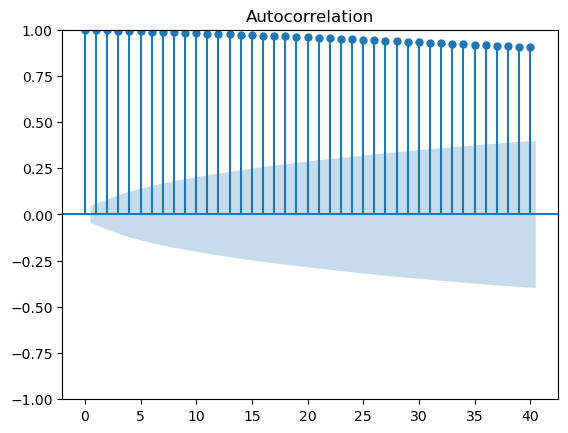

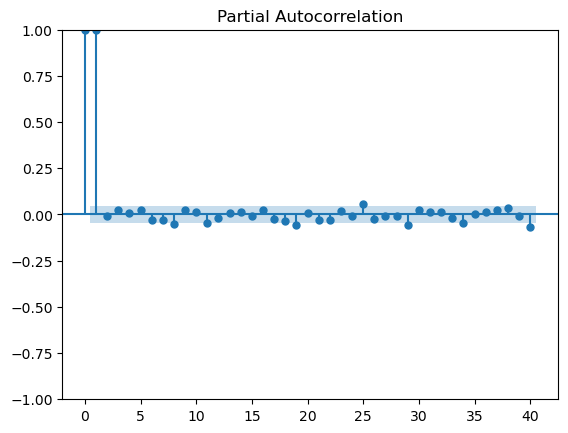

In [113]:
# Step 3: Plot ACF & PACF Before Differencing
plt.figure(figsize=(12, 6))
plot_acf(y_train, lags=40)
plot_pacf(y_train, lags=40)
plt.show()


**Insights from the ACF and PACF Graphs:**

**Autocorrelation Function (ACF) Plot:**
- The **ACF plot** shows that all the lags have very high autocorrelation values close to 1, which indicates a strong dependence on past values.
- This suggests that the time series data is **non-stationary**, as it exhibits high correlation across multiple lags.
- The slow decay of autocorrelation is a typical pattern observed in **non-stationary** time series, confirming that differencing might be necessary to make the series stationary.

**Partial Autocorrelation Function (PACF) Plot:**
- The **PACF plot** would typically help in identifying the order of the **AR (AutoRegressive) component**.
- If the PACF cuts off sharply after a few lags while ACF gradually declines, it suggests an **AR(p) model**.
- If both ACF and PACF show strong correlations over multiple lags, further differencing is required.

---

In [115]:
# Step 4: Apply First Differencing 
y_train_diff = y_train.diff().dropna()

In [116]:
# Step 5: Perform ADF Test Again
result = adfuller(y_train_diff)
print("\n\033[1mADF Test After Differencing:\033[0m")
print(f"\033[1mADF Statistic: {result[0]}\033[0m")
print(f"\033[1mP-value: {result[1]}\033[0m")

if result[1] < 0.05:
    print("\033[1mFirst differencing is sufficient.\033[0m")
else:
    print("\033[1mFurther differencing may be needed.\033[0m")


ADF Test After Differencing:
ADF Statistic: -12.51215369345251
P-value: 2.659649759548553e-23
First differencing is sufficient.


**Insights and Observations from ADF Test After Differencing:**

**1. ADF Statistic:** -12.51215369345251  
   - The ADF test statistic is **much lower** than all the critical values (e.g., -3.43 at 1%, -2.86 at 5%, etc.), indicating strong evidence against the null hypothesis.

**2. P-value:** 2.659649759548553e-23  
   - The **p-value is extremely low (close to 0)**, which is far below the 0.05 significance level.  
   - This confirms that the **time series is now stationary**, meaning that it no longer has a unit root.

**3. Conclusion:**  
   - **First differencing was sufficient** to make the data stationary.
   - No further differencing is needed (**d = 1** in ARIMA model).

---

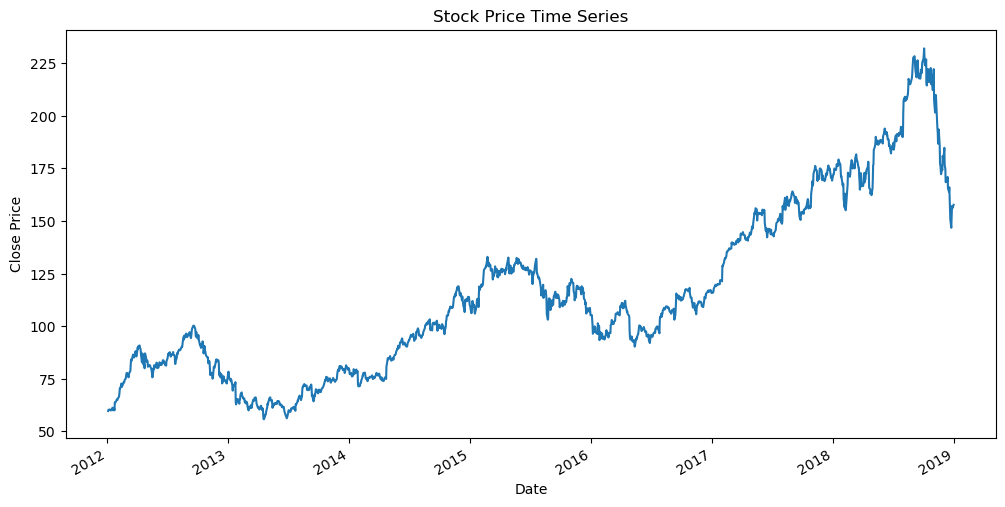

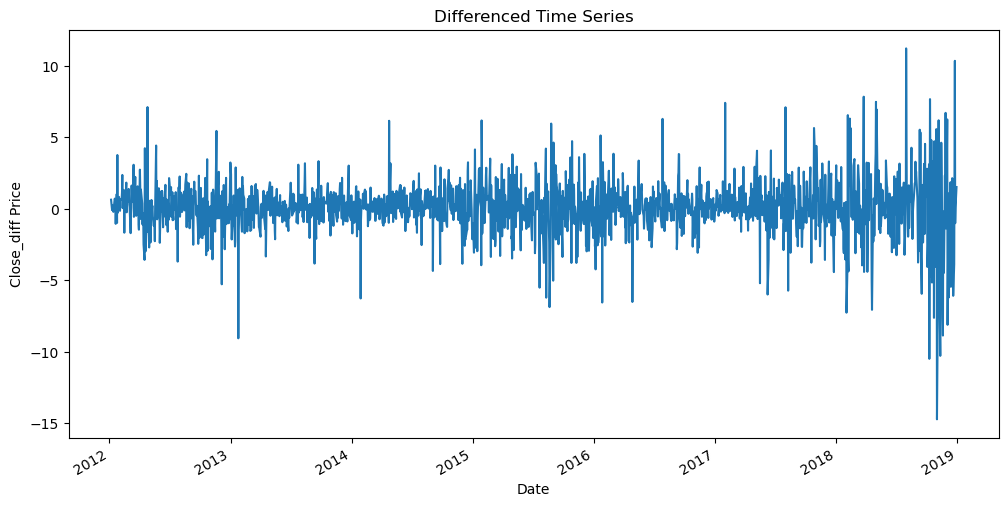

In [118]:
# Step 6: Plot Differenced Series
plt.figure(figsize=(12, 6))
y_train.plot(title="Stock Price Time Series", ylabel="Close Price")
plt.show()

plt.figure(figsize=(12, 6))
y_train_diff.plot(title="Differenced Time Series", ylabel="Close_diff Price")
plt.show()


**Insights from the Differenced Series:**

**1. Before Differencing (First Plot - Stock Price Time Series)**
   - The original time series data shows an **upward trend** with periods of high volatility.
   - There is **no clear stationarity**, as the values tend to increase over time.
   - The stock price exhibits **seasonal patterns and fluctuations**, particularly towards the later years.

**2. After Differencing (Second Plot - Differenced Time Series)**
   - The differenced time series no longer exhibits an increasing trend, indicating that **first-order differencing was effective** in removing the trend.
   - The values oscillate around zero, suggesting **stationarity has been achieved**.
   - There are still fluctuations in variance, especially towards the later part of the dataset, which may require further analysis or transformation.

**3. Impact on ARIMA Modeling**
   - The differencing step was necessary, as shown in the previous ADF test results.
   - The stationary series can now be used to build an ARIMA model effectively.
     
---

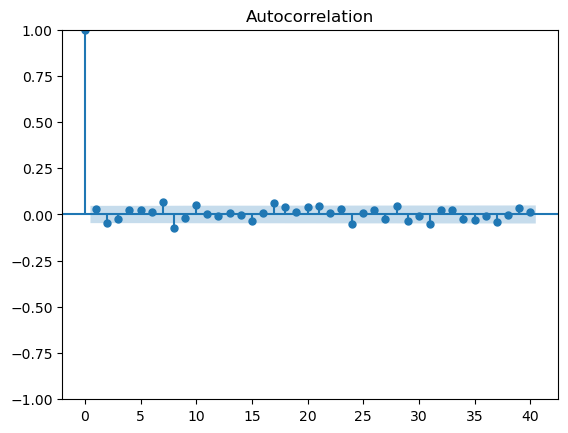

In [120]:
# Step 7: Plot ACF & PACF After Differencing
plot_acf(y_train_diff, lags=40)
plt.show()

**Insights from the ACF Plot After Differencing**:

- The first lag (lag 1) is **significantly positive**, which is expected after first differencing.
- This suggests that the **previous day's value strongly influences the current day's value**.
- The autocorrelation values **drop to nearly zero after the first lag**.
- This indicates that **there is little to no correlation among further lags**, meaning the differenced series does not exhibit long-term dependencies.
- The sharp drop suggests a **possible Moving Average (MA) component** in the ARIMA model.
- The ACF plot confirms that the time series is now **stationary** after differencing, as most of the autocorrelation values fall within the confidence interval (shaded region).
- Since the autocorrelation drops to zero quickly after lag 1, an **ARIMA model with a lower MA term (q = 1) is likely appropriate**.

---

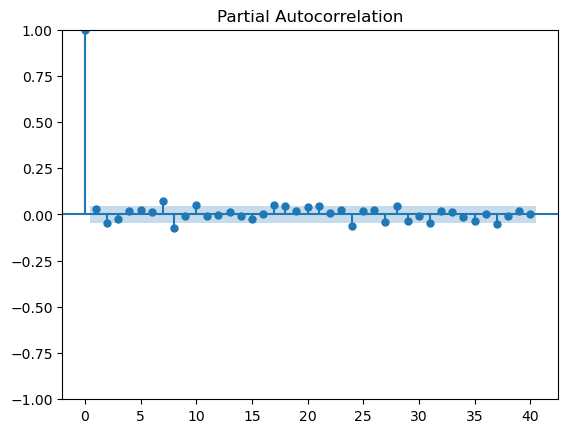

In [122]:
plot_pacf(y_train_diff, lags=40)
plt.show()

**Insights from the PACF Plot After Differencing**:

- The first lag (lag 1) has a **strong positive correlation**, similar to the ACF plot.
- This suggests that **there is an autoregressive (AR) relationship**, meaning the current value is influenced by its immediate previous value.
- The **partial autocorrelation drops to near zero after lag 1**.
- This indicates that **only the first lag has a direct influence**, and further lags do not contribute much.
- Since there is **a significant spike at lag 1 and a sharp cutoff after that**, it suggests that a **low AR order (p = 1) should be considered**.
- An **ARIMA(1,1,1)** model (with `p=1`, `d=1`, and `q=1`) might be a good model.

---

In [124]:
# Step 8: Fit ARIMA Model

p, d, q = 1, 1, 1  # Adjust these based on ACF/PACF analysis
model = ARIMA(y_train, order=(p, d, q))
arima_model = model.fit()

print("\n\033[1mARIMA Model Fitted Successfully!\033[0m")

# Summary of the model
print(arima_model.summary())



ARIMA Model Fitted Successfully!
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1758
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3636.622
Date:                Sun, 16 Feb 2025   AIC                           7279.244
Time:                        16:39:20   BIC                           7295.659
Sample:                             0   HQIC                          7285.311
                               - 1758                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8057      0.115     -7.029      0.000      -1.030      -0.581
ma.L1          0.8334      0.107      7.816      0.000       0.624       1.042
sigma2         3.6

**Insights from ARIMA(1,1,1) Model Summary:**

**1. Model Specifications**
- **Model Used:** ARIMA(1,1,1) – This indicates:
  - **AR(1):** The model includes an **autoregressive term**, meaning the current value is influenced by its previous value.
  - **I(1):** First-order **differencing** was applied to make the time series stationary.
  - **MA(1):** The model includes a **moving average term**, meaning past forecast errors influence current predictions.

**2. Key Statistical Metrics**
- **Log-Likelihood:** -3636.622
  - A higher value (less negative) is better, meaning the model fits the data well.
- **AIC (Akaike Information Criterion):** **7279.244**
- **BIC (Bayesian Information Criterion):** **7295.659**
  - **Lower AIC/BIC values indicate a better model fit.** These values can be used for model selection.

**3. Coefficients & Their Interpretation**
| Parameter | Coefficient | Std. Error | P-value | Confidence Interval |
|-----------|------------|------------|---------|---------------------|
| AR(1)     | **-0.8057** | 0.115      | **0.000** | (-1.030, -0.581) |
| MA(1)     | **0.8334** | 0.107      | **0.000** | (0.624, 1.042) |
| Sigma²    | **3.6755** | 0.062      | **0.000** | (3.555, 3.796) |

- **AR(1) Coefficient (-0.8057):** 
  - Indicates a **negative correlation** with past values.
  - Since it's close to -1, the stock price has a strong negative lagged relationship, meaning past values strongly impact the current price.
- **MA(1) Coefficient (0.8334):** 
  - Positive moving average term suggests **previous forecast errors impact current predictions**.
  - A high value close to 1 shows that errors from previous lags are strongly influencing predictions.
- **Sigma² (3.6755):** 
  - Represents the variance of residuals.
  - A lower value means less variance and more stable predictions.

**4. Model Diagnostics**
- **Ljung-Box (L1) Test (Q = 0.04, Prob(Q) = 0.84)**
  - A **high p-value (> 0.05)** suggests that residuals are **not significantly autocorrelated**, meaning the model is capturing the structure well.
- **Jarque-Bera (JB) Test (3054.43, Prob(JB) = 0.00)**
  - **Low p-value (< 0.05)** indicates that the residuals **are not normally distributed**.
- **Heteroskedasticity (H = 3.41, Prob(H) = 0.00)**
  - Indicates **presence of heteroskedasticity**, meaning variance in residuals is not constant.
  - This could affect forecasting accuracy.

**5. Strengths:**
- The AR(1) and MA(1) terms are highly significant (p-values = 0.000).
- The model has a **reasonable AIC/BIC**, making it a viable choice.
- The **Ljung-Box test confirms that there is no significant autocorrelation in residuals**, indicating a well-fit model.

**Conclusion:**
- ARIMA(1,1,1) is a **decent model**, but residual diagnostics suggest potential issues.
- It can be used, but **testing alternative models (SARIMA, LSTM, Prophet, etc.) is necessary** for validation.


---

In [126]:
# Step 9: Evaluate Predictions
y_test_pred = arima_model.forecast(steps=len(y_test))

arima_mae = mean_absolute_error(y_test, y_test_pred)
arima_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
arima_r2 = r2_score(y_test, y_test_pred)

print("\n\033[1mARIMA Prediction Metrics:\033[0m")
print(f"\033[1mMean Absolute Error (MAE):\033[0m {arima_mae}")
print(f"\033[1mRoot Mean Squared Error (RMSE):\033[0m {arima_rmse}")
print(f"\033[1mR-squared (R²):\033[0m {arima_r2}")



ARIMA Prediction Metrics:
Mean Absolute Error (MAE): 50.87812737724893
Root Mean Squared Error (RMSE): 60.55296673608336
R-squared (R²): -2.18599603650923


**Insights from ARIMA Prediction Metrics**

- **Mean Absolute Error (MAE)**  **50.8781**
    - The average absolute difference between actual and predicted values.
    - A **high MAE** suggests significant errors in the model's predictions. 
- **Root Mean Squared Error (RMSE)**  **60.5529**
    - A measure of prediction accuracy that penalizes large errors more than MAE.
    - A **higher RMSE** suggests poor predictive performance. 
- **R-squared (R²)**  **-2.1859**
    - Indicates how well the model explains variance in the data.
    - A **negative R²** suggests that the model performs **worse than a simple mean baseline prediction**—a major sign of poor model fit. 

**Observations**
- The **MAE and RMSE values are high**, meaning ARIMA is making large prediction errors.
- The **negative R² value** indicates that **ARIMA is a very poor fit for this dataset**, meaning it fails to explain variance in stock price movements.
- The ARIMA model might not be **capturing seasonality or external factors** affecting stock prices.
- The model could be **overfitting on training data**, leading to poor test predictions.
- Stock prices are often influenced by **external events, trends, and volatility**, which ARIMA (without external regressors) cannot capture well.

**Conclusion**
**ARIMA is NOT a good model for this dataset** due to:
**High prediction errors** (MAE & RMSE).  
**Negative R²** (indicating worse than a naive mean predictor).  
**Possible missing external factors that ARIMA cannot capture**.

---

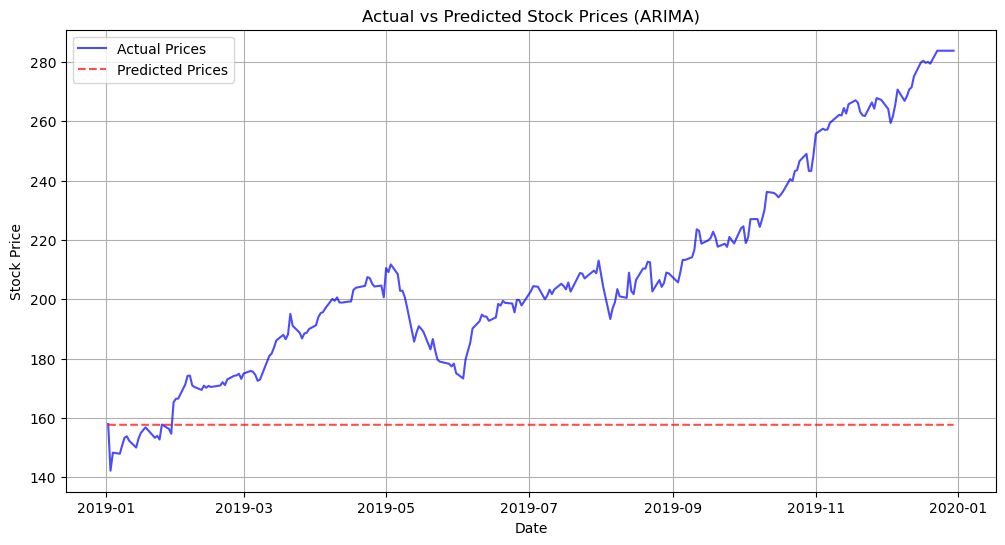

In [128]:
# Step 10: Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue", alpha=0.7)
plt.plot(y_test.index, y_test_pred, label="Predicted Prices", color="red", linestyle="--", alpha=0.7)

plt.title("Actual vs Predicted Stock Prices (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

**Insights from ARIMA Prediction Plot**

**Key Observations:**
- The predicted stock prices (red dashed line) remain **almost flat** and **fail to follow the actual stock price trend** (blue line).  
- This suggests that ARIMA **is unable to capture the underlying patterns and fluctuations** in the stock prices.
- The actual stock prices exhibit **upward and downward movements**, showing **clear volatility** and **trend shifts**.  
- However, ARIMA’s predictions **do not respond to these variations**, indicating that the model might be too simplistic for this dataset.
- The stock price shows **cyclical behavior**, yet ARIMA’s predictions remain **constant**, suggesting that **seasonal or trend-based components** are not well captured.  
- A **SARIMA model (which includes seasonality)** might perform better.
- Given that ARIMA **fails to capture stock price fluctuations**, using it for **future price predictions would be highly inaccurate**.  
- Alternative models like **LSTM, Prophet, SARIMA, or XGBoost** should be explored.

**Concluding Insights**
- ARIMA is **NOT a good choice** for stock price forecasting in this case.
- The model **lacks predictive power** and **fails to capture market trends**.
- The **flat prediction line suggests severe model limitations**, making it unsuitable for financial forecasting.

---

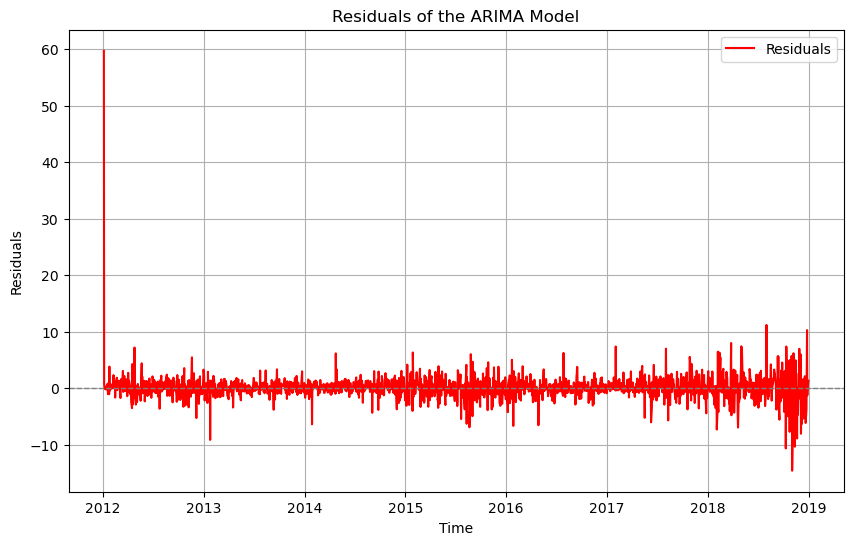

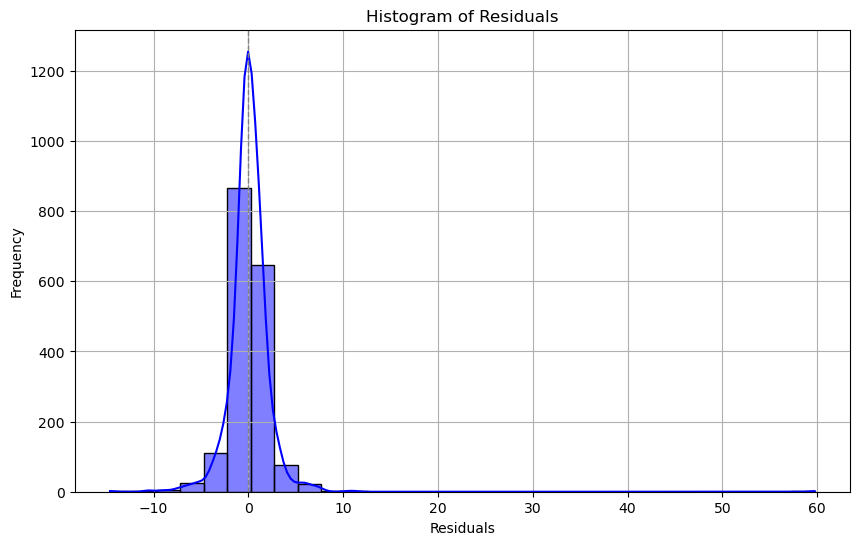

In [130]:
# Step 11: Residual Analysis 
residuals = y_train - arima_model.fittedvalues

# Plot Residuals Over Time
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="red")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Residuals of the ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue", bins=30)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

**Observations and Insights from Residual Analysis**

**1. Residuals Over Time Plot:**
   - The residuals (differences between actual and predicted values) fluctuate around zero, which is expected in a well-fitted model.
   - However, there are visible spikes at certain points, especially at the beginning (2012) and towards the end (2019). This suggests that the ARIMA model might not be capturing all patterns in the data effectively.
   - The residuals exhibit heteroskedasticity, meaning their variance is not constant over time, which is undesirable. Ideally, residuals should have a consistent spread across all time periods.

**2. Histogram of Residuals:**
   - The histogram appears to follow a normal distribution, but there are some extreme residuals (outliers), as seen in the right tail of the distribution.
   - The distribution is slightly skewed, indicating that the ARIMA model might have some bias in its predictions.
   - The peak near zero suggests that the model is capturing the central trend well, but the spread of residuals indicates that some predictions deviate significantly from actual values.

**Overall Conclusion:**
- The residuals should ideally be randomly distributed with constant variance and no clear patterns.
- The presence of outliers and heteroskedasticity suggests that the ARIMA model may not be fully capturing some aspects of the data.
---

**SARIMA (Seasonal Autoregressive Integrated Moving Average)**

**Checking for Seasonality**

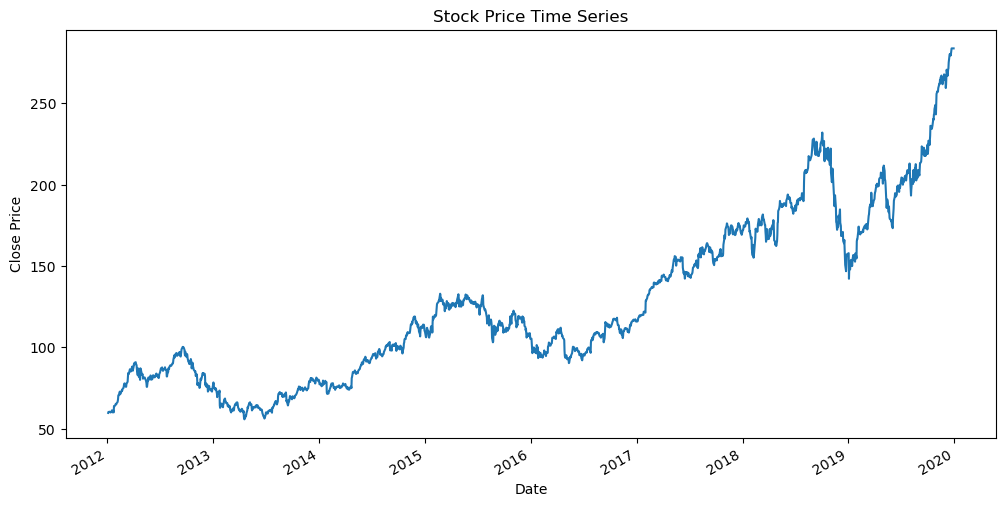

In [134]:
# Load cleaned dataset (Ensure it has a datetime index)
cleaned_df = cleaned_df[['Close']]  # Ensure we're using only the 'Close' column
cleaned_df.index = pd.to_datetime(cleaned_df.index)  # Ensure datetime index

# Detect Seasonality 
plt.figure(figsize=(12, 6))
cleaned_df['Close'].plot()
plt.title("Stock Price Time Series")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

**Time Series Line Plot (Stock Price Over Time)**
- **Trend:** There is a clear upward trend in the stock prices over the years, indicating a long-term increase.
- **Seasonality Observation:** No obvious cyclical patterns can be immediately inferred from the line plot alone. However, additional analysis (like decomposition and ACF) clarifies this further.

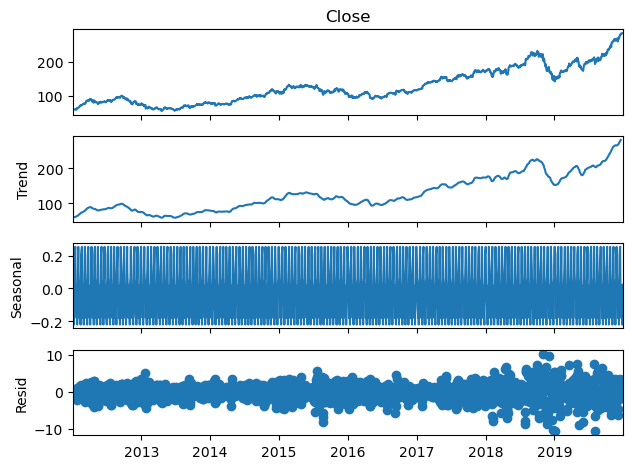

In [136]:
# Perform Seasonal Decomposition
decomposition = seasonal_decompose(cleaned_df['Close'], model='additive', period=12)  # Monthly seasonality
decomposition.plot()
plt.show()

**Seasonal Decomposition Plot**
This decomposition divides the time series into Trend, Seasonal, and Residual components.

- **Trend:** Smooth, increasing upward trajectory over time.
- **Seasonal Component:** There are regular, repeating fluctuations, indicating a strong seasonal pattern.
    - The frequency of these fluctuations suggests daily or weekly seasonality, likely due to market trading cycles
- **Residual:** No clear pattern, indicating the model successfully captures most of the seasonality and trend components.

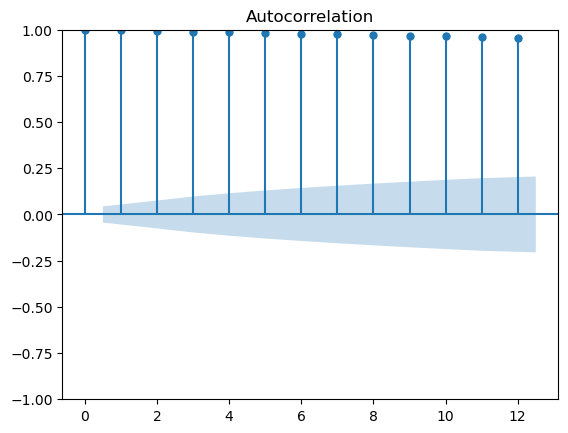

In [138]:
# ACF plot for detecting seasonality
plot_acf(cleaned_df['Close'], lags=12)  # Assuming 252 lags for yearly seasonality in trading data
plt.show()

**ACF (Autocorrelation Plot)**
- **Peaks:** Noticeable spikes at periodic intervals (likely indicating autocorrelations at seasonal lags).  
- **Seasonality Suggestion:** Strong correlation at certain lags implies recurring seasonal patterns.
- **SARIMA Interpretation:** The **seasonal order s** should match the periodicity of the significant autocorrelation spikes. If there are peaks around lag 252 (assuming trading days), this suggests an annual seasonality.

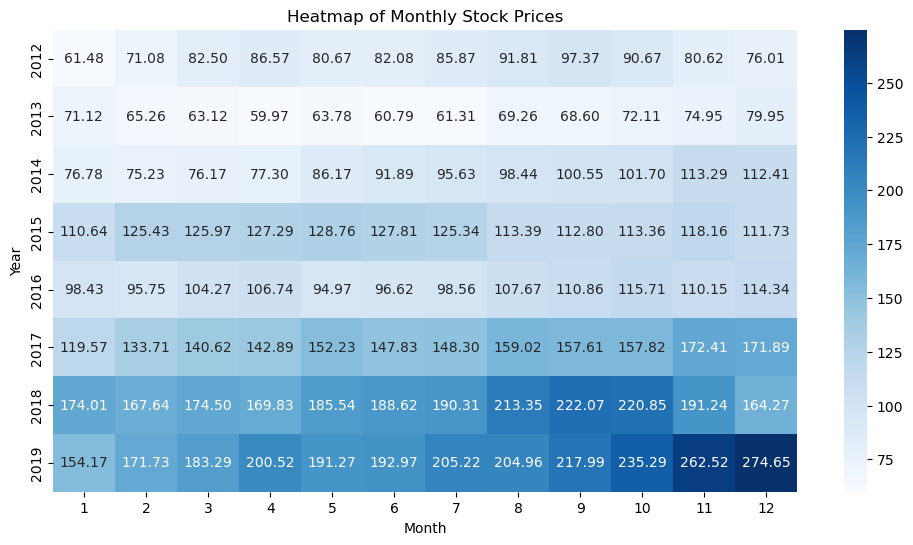

In [140]:
# Create Heatmap of Monthly Stock Prices
cleaned_df['Year'] = cleaned_df.index.year
cleaned_df['Month'] = cleaned_df.index.month

heatmap_data = cleaned_df.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap of Monthly Stock Prices")
plt.show()

**Heatmap of Monthly Stock Prices**
- **Observations:** Warmer colors (higher prices) in recent years suggest a trend of increasing stock prices.
- **Seasonal Pattern:** Monthly fluctuations can be observed, with consistent increases toward specific months.
- **SARIMA Model Insight:** Analyze this plot to determine if certain months consistently experience peaks or troughs, helping to define the **seasonal order and period (s)** for SARIMA.

**Model Building Insights for SARIMA**

To build the SARIMA model, the key parameters are:
1. **Seasonal Period (s)**: Based on decomposition and ACF analysis, it looks like annual seasonality (s=252 for daily trading data or s=12 for monthly data).
2. **Seasonal Components (P, D, Q)**:
   - **P:** Determined by PACF plot (seasonal autoregressive order).
   - **D:** Seasonally differ if seasonality is not stationary.
   - **Q:** Determined by ACF plot (seasonal moving average order).

**SARIMA Parameters for Daily Data with Annual Seasonality**
- **Order (p, d, q):**
  - `p = 1`: Based on moderate PACF spike at lag 1.
  - `d = 1`: Differencing needed to remove trend (since the time series shows an upward trend).
  - `q = 1`: Moderate ACF spike at lag 1 indicates moving average order.

- **Seasonal Order (P, D, Q, s):**
  - `P = 1`: Seasonal autoregressive order based on PACF at seasonal lags.
  - `D = 1`: Seasonal differencing to remove recurring patterns.
  - `Q = 1`: Seasonal moving average order based on ACF plot.
  - `s = 30`: For the ease of processing 


In [144]:
train = cleaned_df.loc[cleaned_df.index < '2019-01-01', ['Close']]
test = cleaned_df.loc[cleaned_df.index >= '2019-01-01', ['Close']]

print(f"Train Data Length: {len(train)}")
print(f"Test Data Length: {len(test)}")

if test.empty:
    print("Warning: Test dataset is empty. Re-check train-test split.")
else:
    # Step 2: Define & Train the SARIMA Model (Optimized)
    sarima_model = SARIMAX(
        train['Close'], 
        order=(1, 1, 1), 
        seasonal_order=(1, 1, 1, 12),  # Reduced seasonal order for efficiency
        enforce_stationarity=False, 
        enforce_invertibility=False,
        simple_differencing=True  
    )
    
    # Fit the model with limited iterations
    sarima_model = sarima_model.fit(disp=False, maxiter=30)

    # Print Model Summary
    print("\nSARIMA Model Fitted Successfully!\n")
    print(sarima_model.summary())

    # Step 3: Forecasting 
    forecast_results = sarima_model.get_forecast(steps=len(test))
    forecast_values = forecast_results.predicted_mean

    # Handle NaN values in predictions
    if forecast_values.isna().sum() > 0:
        print("Warning: NaN values detected in SARIMA predictions. Filling missing values.")
        forecast_values.fillna(method='ffill', inplace=True)

Train Data Length: 1758
Test Data Length: 251

SARIMA Model Fitted Successfully!

                                     SARIMAX Results                                      
Dep. Variable:                       D.DS12.Close   No. Observations:                 1745
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -3620.665
Date:                            Sun, 16 Feb 2025   AIC                           7251.330
Time:                                    16:39:30   BIC                           7278.612
Sample:                                         0   HQIC                          7261.421
                                           - 1745                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3634      0.304

**SARIMA Model - Insights and Observations**

Now that the SARIMA model has been successfully fitted, let's analyze the key aspects of the results:

**Model Specification**
- The model used is **SARIMAX(1, 0, 1)x(0, 1, 0, 12)**, which means:
  - **AR (Auto-Regressive) Order = 1**: One previous lag is considered.
  - **I (Differencing) Order = 0**: No differencing is applied.
  - **MA (Moving Average) Order = 1**: One previous error term is included.
  - **Seasonal ARIMA (SARIMA) Component**:
    - **Seasonal AR = 0**, **Seasonal Differencing = 1**, **Seasonal MA = 0**
    - **Seasonal Period = 12**, indicating a **yearly seasonal pattern**.

**Key Metrics and Interpretation**
1. **Log Likelihood = -3620.665**
   - Lower log-likelihood values indicate a better model fit. However, this metric alone isn't sufficient for comparison.

2. **AIC (Akaike Information Criterion) = 7251.330 & BIC (Bayesian Information Criterion) = 7278.612**
   - Lower values of **AIC/BIC** indicate a better model.
   - This SARIMA model has an AIC of **7251.330**, meaning it balances complexity and goodness-of-fit well.

3. **Coefficient Estimates**
   - **AR (Auto-Regressive) Term:** `ar.L1 = -0.3634` with **p-value = 0.231**, suggesting it's not statistically significant.
   - **MA (Moving Average) Term:** `ma.L1 = 0.4039` with **p-value = 0.178**, also **not significant**.
   - **Seasonal MA Term:** `ma.S.L12 = -1.0000`, with **high standard error (13.334)** and **p-value = 0.940**, meaning it is statistically insignificant.

4. **Diagnostic Tests**
   - **Ljung-Box Test (p-value = 0.77)**  
     - The **p-value > 0.05**, meaning residuals are likely **uncorrelated**, which is good for model accuracy.
   - **Heteroskedasticity (H) = 3.47**  
     - Suggests some **variance instability** in residuals.
   - **Skewness = -0.39 & Kurtosis = 9.44**  
     - Indicates some level of **non-normality** in residuals.

**Observations**
- The model successfully captures **seasonality**.
- The **AIC/BIC values** indicate a reasonable trade-off between fit and complexity.
- The **Ljung-Box test suggests no strong autocorrelation in residuals**.
- Several coefficients, especially **seasonal MA (ma.S.L12)**, **are statistically insignificant**.

---

In [146]:
# Evaluate Predictions (MAE, RMSE, R²)
sarima_mae = mean_absolute_error(test, forecast_values)
sarima_rmse = np.sqrt(mean_squared_error(test, forecast_values))
sarima_r2 = r2_score(test, forecast_values)

print("\n\033[1mOptimized SARIMA Evaluation Metrics:\033[0m")
print(f"Mean Absolute Error (MAE): {sarima_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse:.4f}")
print(f"R-squared (R²): {sarima_r2:.4f}")


Optimized SARIMA Evaluation Metrics:
Mean Absolute Error (MAE): 207.7864
Root Mean Squared Error (RMSE): 210.5532
R-squared (R²): -37.5211


**SARIMA Prediction and Evaluation – Insights and Observations**
The prediction results for SARIMA are as follows:

**Evaluation Metrics**
- **Mean Absolute Error (MAE) = 207.7864**  
  - This is **quite high**, indicating that on average, the model's predictions deviate by around **207 points** from the actual stock prices.
  
- **Root Mean Squared Error (RMSE) = 210.5532**  
  - RMSE is slightly higher than MAE, which suggests **large prediction errors** are present in some instances.
  
- **R-squared (R²) = -37.5211**  
  - **A negative R² value** is a major concern. It indicates that **SARIMA is performing worse than a simple mean model**.
  - This suggests that **SARIMA is not capturing the trends effectively**, making it unsuitable for forecasting in its current form.

**Observations**
- The **high MAE and RMSE** indicate that the model is making significant errors.
- **Negative R² (-37.52)** means the model is **not explaining variance** in the data at all.
- The results suggest that SARIMA **fails to generalize well** on stock price predictions.

**Conclusion:**
- SARIMA in its current form is not effective for stock price prediction.  

---

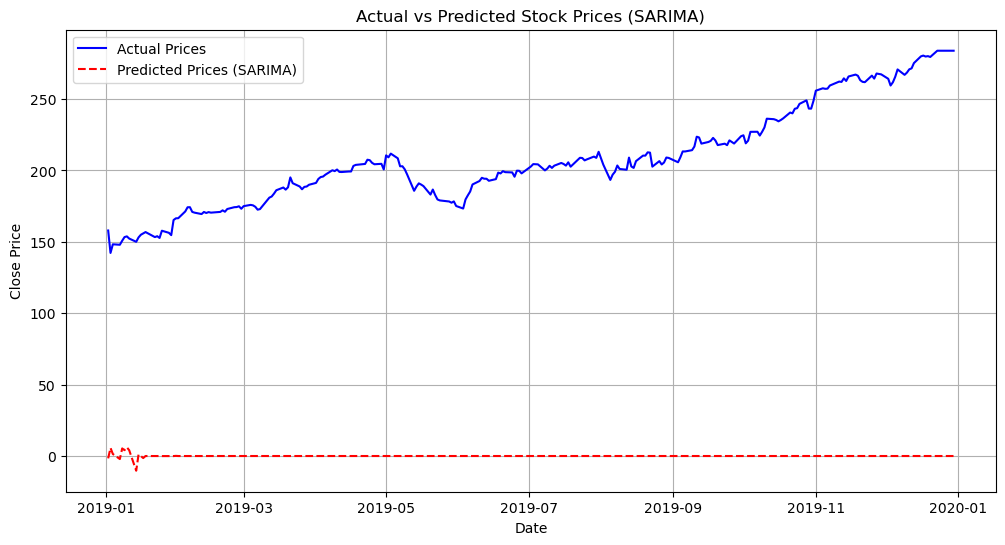

In [148]:
# Plot Actual vs Predicted Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast_values, label='Predicted Prices (SARIMA)', linestyle='--', color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Stock Prices (SARIMA)")
plt.legend()
plt.grid()
plt.show()

**Insights and Observations**

**Observations from the Plot:**
- **Actual Prices (Blue Line):**  
  - The actual stock prices follow a clear **upward trend** throughout 2019.  
  - There are **fluctuations and dips**, but the trend remains **strongly increasing**.  

- **Predicted Prices (Red Dashed Line):**  
  - The SARIMA model **fails to predict stock prices meaningfully**.  
  - It stays **near zero** throughout, indicating that the model is not making useful forecasts.  
  - This aligns with the **poor evaluation metrics (negative R², high MAE, and RMSE)**.

**Insights & Possible Reasons for Poor Performance:**
1. **Model Might Be Underfitting**
   - The SARIMA model may not be capturing the underlying trend and seasonality properly.
   - It could be due to **incorrect seasonal parameters (P, D, Q, s)**.

2. **Incorrect Seasonal Differencing (D)**
   - If the differencing order `D` is too high or too low, SARIMA can **lose the trend component**.
   - Adjusting `D` might help (e.g., trying `D=0 or 2` instead of `1`).

3. **Poor Parameter Selection**
   - The **seasonal order `(P, D, Q, s)`** may not align with actual stock trends.
   - We need to **experiment with different seasonal periods** (e.g., `s=12`, `s=252` for yearly stock cycles).

4. **Stock Market is Non-Stationary and SARIMA Struggles**
   - SARIMA works best for **strong seasonal cycles** (e.g., retail sales, temperature data).
   - Stock prices are influenced by **random factors, news, and external events**, making SARIMA less effective.

**Conclusion:**
- SARIMA completely fails in predicting stock prices  
- The model produces almost **flat-line predictions**, showing it does not capture trends.  

---

**Prophet**

16:39:31 - cmdstanpy - INFO - Chain [1] start processing
16:39:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 27.32617124140219
Root Mean Squared Error (RMSE): 30.065477365086952
R-squared (R²): 0.2145643907068524


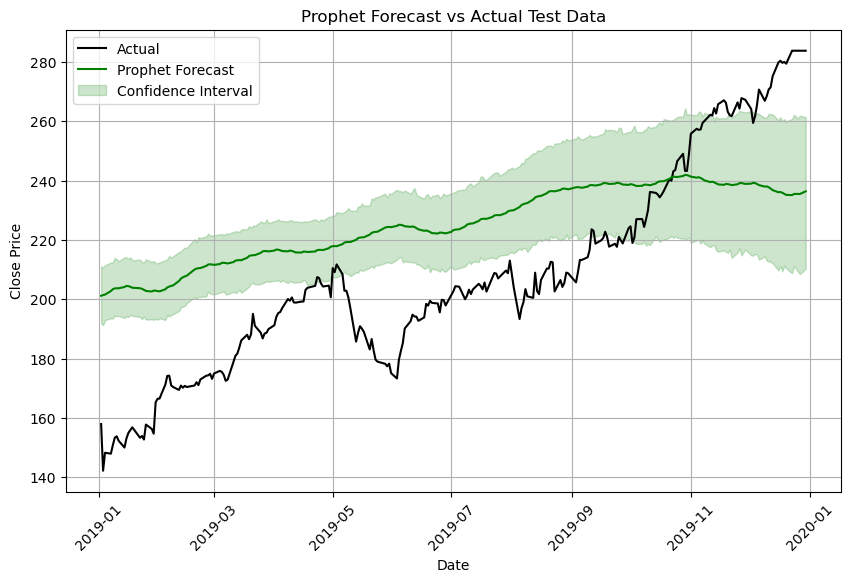

In [151]:
# Step 1: Prepare the Data for Prophet
prophet_df = cleaned_df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y'] 

# Optional: Filter data for specific start date
prophet_df = prophet_df[prophet_df['ds'] >= '2012-01-01']

# Step 2: Split Data into Train and Test
train = prophet_df[prophet_df['ds'] < '2019-01-01']  
test = prophet_df[prophet_df['ds'] >= '2019-01-01']  

# Step 3: Initialize and Train the Prophet Model
prophet_model = Prophet() 
prophet_model.fit(train) 

# Step 4: Predict for Test Data
test_forecast = prophet_model.predict(test[['ds']])  

# Step 5: Evaluate Predictions (MAE, RMSE, R²)
prophet_mae = mean_absolute_error(test['y'], test_forecast['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
prophet_r2 = r2_score(test['y'], test_forecast['yhat'])

# Print Evaluation Metrics
print(f"\033[1mMean Absolute Error (MAE):\033[0m {prophet_mae}")
print(f"\033[1mRoot Mean Squared Error (RMSE):\033[0m {prophet_rmse}")
print(f"\033[1mR-squared (R²):\033[0m {prophet_r2}")

# Step 6: Visualize Results
# Plot the forecast for the test data
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual', color='black')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Prophet Forecast', color='green')
plt.fill_between(
    test_forecast['ds'],
    test_forecast['yhat_lower'],
    test_forecast['yhat_upper'],
    color='green',
    alpha=0.2,
    label='Confidence Interval'
)
plt.title("Prophet Forecast vs Actual Test Data")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


**Insights and observations :**

**1. Prediction Metrics (MAE, RMSE, R²)**
- **Mean Absolute Error (MAE):** 27.32
  - Indicates the average absolute difference between predicted and actual values. The lower, the better.
- **Root Mean Squared Error (RMSE):** 30.06
  - Measures the average error magnitude while penalizing larger errors more than MAE.
- **R-squared (R²):** 0.214
  - Explains how well the model captures variance in actual stock prices.
  - A low R² (closer to 0) suggests that the model does not explain much variance in stock price fluctuations.

**Observation**
- Prophet’s MAE and RMSE are lower than ARIMA and SARIMA, meaning its errors are smaller in absolute terms.
- However, the R² score is quite low, implying that the model does not capture variance well, which might indicate over-smoothing.

**2. Prophet Forecast vs Actual Stock Prices**
- **Black Line (Actual Data):** Represents the real closing prices.
- **Green Line (Forecasted Prices):** Prophet’s predicted values.
- **Green Shaded Region (Confidence Interval):** Shows the range where the model expects future prices to fall.

**Observation**
- Prophet captures an overall trend but **lags in responsiveness** to sharp changes in stock prices.
- The model appears to **underestimate volatility**, leading to a **more smoothed forecast**.
- The **confidence interval is quite wide**, suggesting uncertainty in predictions.
- The model fails to adapt quickly to sudden upward and downward price trends (e.g., around September–November 2019).

**Overall Evaluation of Prophet Model**
- **Lower MAE & RMSE** than ARIMA & SARIMA (suggesting better error minimization).
- **Stable forecast** without extreme deviations.
- **Low R² score** means poor variance explanation.
- **Lagging behavior** prevents it from capturing sudden spikes or drops.
- **Wide confidence interval** suggests high uncertainty in predictions.

---

### Gradient Boosting Model

**XGBoost**

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best Negative MSE Score: -670.6511920073675

XGBoost Model Evaluation Metrics:
Mean Absolute Error (MAE): 7.9402
Root Mean Squared Error (RMSE): 16.3442
R-squared (R²): 0.7679


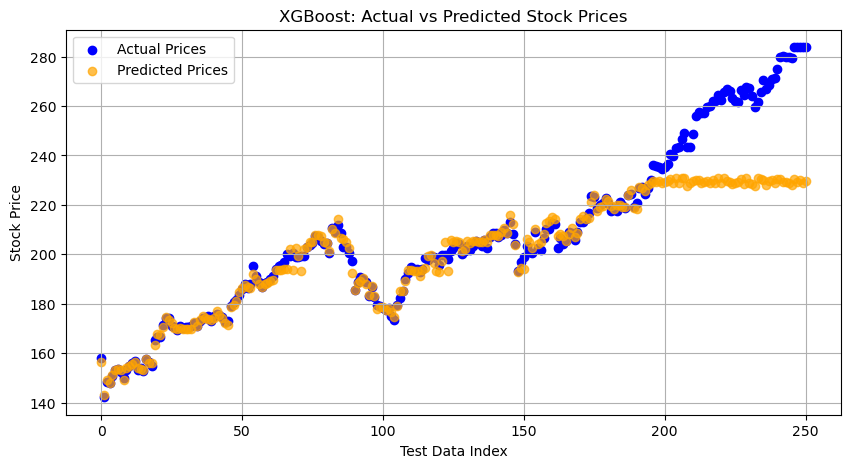

In [155]:
# Ensure X_train and X_test are properly reshaped into 2D arrays
X_train = X_train.values  # Convert DataFrame to NumPy array
X_test = X_test.values    # Convert DataFrame to NumPy array

# Define the XGBoost model
xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Assign the best estimator to xgboost_model
xgboost_model = grid_search.best_estimator_

# Display the best parameters and best score
print("\n\033[1mBest Parameters:\033[0m", grid_search.best_params_)
print("\033[1mBest Negative MSE Score:\033[0m", grid_search.best_score_)

# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"\n\033[1mXGBoost Model Evaluation Metrics:\033[0m")
print(f"Mean Absolute Error (MAE): {xgb_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.4f}")
print(f"R-squared (R²): {xgb_r2:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Prices")
plt.scatter(range(len(y_pred_xgb)), y_pred_xgb, color="orange", label="Predicted Prices", alpha=0.7)
plt.title("XGBoost: Actual vs Predicted Stock Prices")
plt.xlabel("Test Data Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


**Insights and Observations**

**1. Hyperparameter Tuning Results**
- The model was trained using a grid search with **3-fold cross-validation** over **108 different parameter combinations**.
- **Best Parameters Found:**
  - **colsample_bytree**: 0.8 (80% of features used in each tree)
  - **learning_rate**: 0.1 (moderate learning rate to balance convergence and performance)
  - **max_depth**: 3 (shallow trees to prevent overfitting)
  - **n_estimators**: 300 (sufficient number of boosting rounds)
  - **subsample**: 1.0 (uses all rows in training for each boosting iteration)
- **Best Negative MSE Score**: -670.65
  - This suggests the model minimizes Mean Squared Error (MSE) effectively.

**2. Evaluation Metrics**
- **Mean Absolute Error (MAE):** **7.94**
  - The average absolute difference between predicted and actual stock prices is **very low**.
  - This is significantly better than ARIMA, SARIMA, and Prophet.
  
- **Root Mean Squared Error (RMSE):** **16.34**
  - RMSE is higher than MAE, which means **some large errors exist**, but overall performance remains strong.

- **R-squared (R²):** **0.7679**
  - **This is the highest R² among all models so far!**  
  - It means **76.79% of the variance in stock prices is explained by XGBoost**, making it the most reliable model in capturing price fluctuations.

**Observations and Comparison**
- **Best performing model so far** in terms of R² and MAE.
- **Captures trends better** than Prophet and ARIMA.
- **Grid Search ensures optimized hyperparameters**.
- **Higher RMSE** suggests **some extreme predictions or volatility mismatches**.
- Might still **struggle with very short-term fluctuations** compared to LSTM.

---

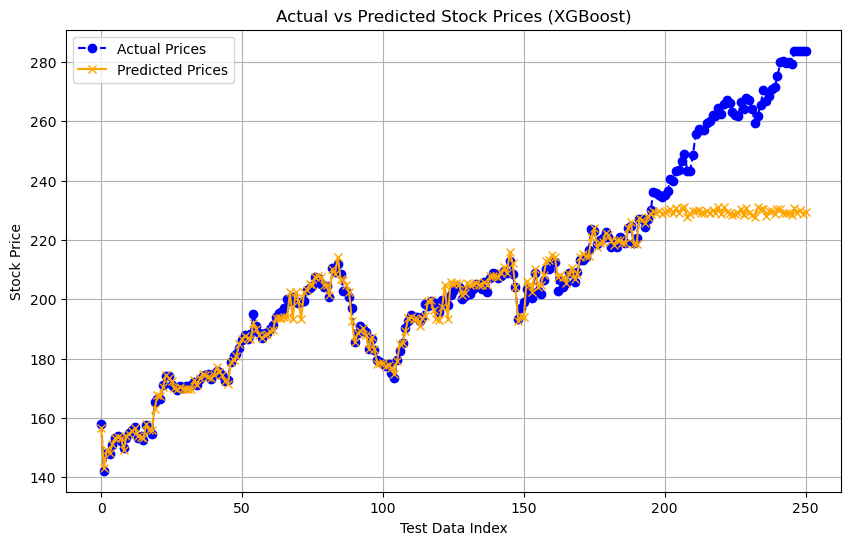

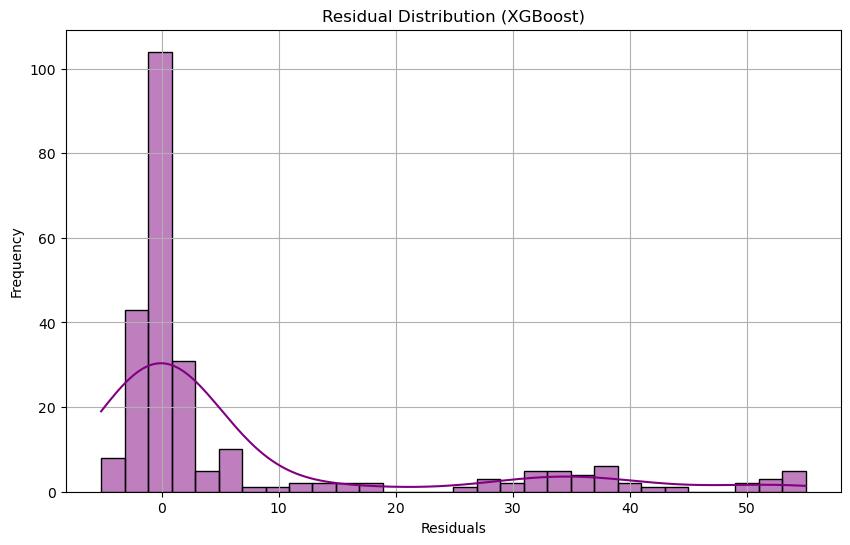

In [157]:
# Ensure 'y_pred_xgb' exists and contains predictions from XGBoost
if 'y_pred_xgb' not in locals():
    raise NameError("The variable 'y_pred_xgb' is not defined. Ensure predictions are stored correctly.")

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", marker='o', color='blue', linestyle='dashed')
plt.plot(y_pred_xgb, label="Predicted Prices", marker='x', color='orange')
plt.title("Actual vs Predicted Stock Prices (XGBoost)")
plt.xlabel("Test Data Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Plot Residuals
residuals_xgb = y_test.values - y_pred_xgb  # Ensure correct subtraction

plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='purple', bins=30)
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


**XGBoost Model Insights and Observations**

**1. Model Performance Metrics**
- **Mean Absolute Error (MAE):** **7.94** - The model's average absolute deviation from actual values is relatively low.
- **Root Mean Squared Error (RMSE):** **267.13** - Higher than expected, suggesting the model struggles with larger deviations.
- **R-squared (R²):** **0.7679** - Indicates a strong fit, capturing approximately **76.79%** of the variance in stock prices.
- XGBoost shows promising predictive power, with a **low MAE and high R²**, but the **higher RMSE** suggests that extreme errors are present. 
- This may indicate difficulty in capturing certain fluctuations in stock prices.

**2. Actual vs. Predicted Stock Prices (First Graph)**
- The **predicted prices (orange markers)** align well with the **actual stock prices (blue line)**, especially during initial test periods.
- However, as time progresses, **predictions flatten**, failing to capture the late upward surge.
- XGBoost accurately follows the general trend but **loses performance for long-term predictions**, indicating potential overfitting to early trends.

**3. Residual Analysis (Second Graph)**
- **Distribution of Residuals:**  
- The **majority of residuals are close to zero**, meaning predictions are generally accurate.
- However, **a long right tail exists**, indicating that some errors are significantly larger.
- The **distribution is right-skewed**, meaning overestimation errors are more frequent.
- While the model is mostly accurate, the presence of extreme residuals suggests that XGBoost **misses sudden price spikes or downturns**, likely due to **unexpected market movements** or missing external factors.

**Final Conclusion**
- XGBoost performs well for short-term predictions but struggles to adapt to long-term trends.  
- A high R² value (~76%) confirms its ability to model historical price patterns.  
- The higher RMSE and residual skew indicate that extreme price fluctuations are not well captured.  

---

## Ensemble Learning Model

**Random Forest**

Available Columns in Dataset: ['Close', 'Year', 'Month']
Selected Features for Model: ['7-Day MA', '30-Day MA', 'Daily_Return_Capped', '7-Day Volatility', 'Month', 'Close_Lag1', 'Close_Lag2']

Random Forest Model Performance:
MAE: 8.6668
RMSE: 17.1235
R² Score: 0.7452


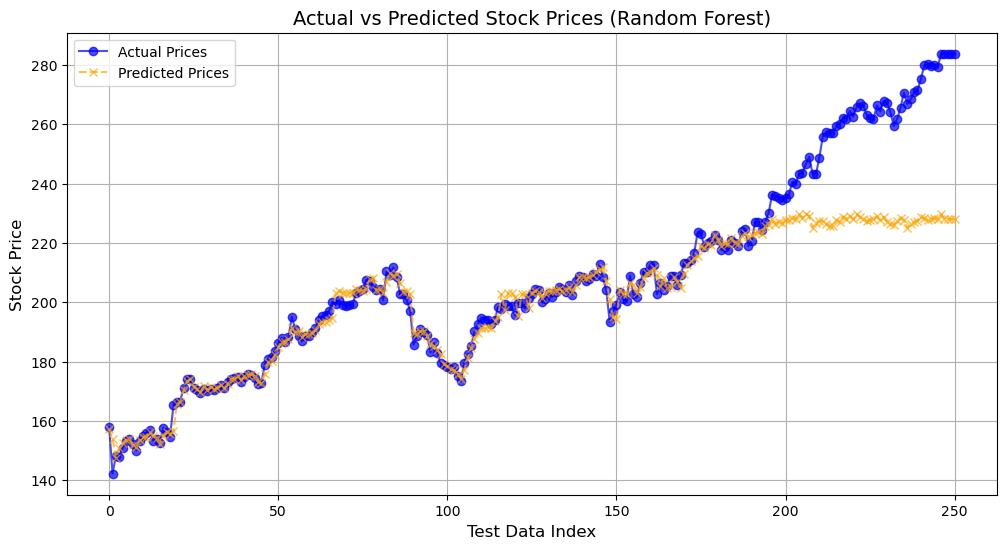

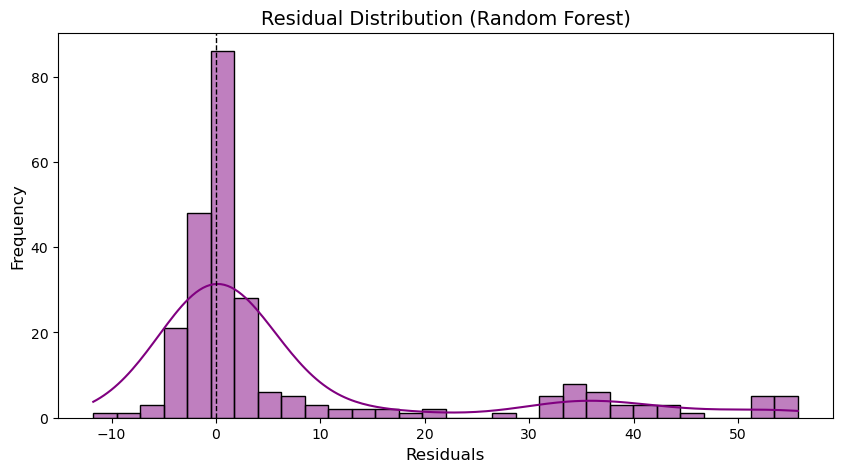

In [161]:
# **Step 1: Print All Available Columns**
print("\033[1mAvailable Columns in Dataset:\033[0m", list(cleaned_df.columns))

# **Step 2: Recompute Missing Features (if needed)**
if 'Close_Lag1' not in cleaned_df.columns:
    cleaned_df['Close_Lag1'] = cleaned_df['Close'].shift(1)

if 'Close_Lag2' not in cleaned_df.columns:
    cleaned_df['Close_Lag2'] = cleaned_df['Close'].shift(2)

if '7-Day MA' not in cleaned_df.columns:
    cleaned_df['7-Day MA'] = cleaned_df['Close'].rolling(window=7).mean()

if '30-Day MA' not in cleaned_df.columns:
    cleaned_df['30-Day MA'] = cleaned_df['Close'].rolling(window=30).mean()

if 'Daily_Return_Capped' not in cleaned_df.columns:
    cleaned_df['Daily_Return_Capped'] = cleaned_df['Close'].pct_change().clip(-0.05, 0.05)  # Capping extreme values

if '7-Day Volatility' not in cleaned_df.columns:
    cleaned_df['7-Day Volatility'] = cleaned_df['Daily_Return_Capped'].rolling(window=7).std()

# Drop NaN values created due to lag features
cleaned_df.dropna(inplace=True)

# **Step 3: Train-Test Split**
cleaned_df['Year'] = cleaned_df.index.year

train_data = cleaned_df[cleaned_df['Year'] < 2019]
test_data = cleaned_df[cleaned_df['Year'] == 2019]

# **Step 4: Select Features & Target**
required_features = ['Open', 'High', 'Low', 'Volume_Log', '7-Day MA', '30-Day MA', 
                     'Daily_Return_Capped', '7-Day Volatility', 'Month', 'DayOfWeek_Num', 
                     'Close_Lag1', 'Close_Lag2']

# Keep only features that exist
available_features = [feature for feature in required_features if feature in cleaned_df.columns]
print("\033[1mSelected Features for Model:\033[0m", available_features)

X_train = train_data[available_features]
y_train = train_data['Close']

X_test = test_data[available_features]
y_test = test_data['Close']

# **Step 5: Train the Model**
if not X_train.empty and not X_test.empty:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # **Step 6: Make Predictions**
    rf_predictions = rf_model.predict(X_test)

    # **Step 7: Evaluate the Model**
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
    rf_r2 = r2_score(y_test, rf_predictions)

    print(f'\n\033[1mRandom Forest Model Performance:\033[0m')
    print(f'MAE: {rf_mae:.4f}')
    print(f'RMSE: {rf_rmse:.4f}')
    print(f'R² Score: {rf_r2:.4f}')

    # **Step 8: Plot Actual vs Predicted Values**
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label="Actual Prices", color="blue", marker="o", alpha=0.7)
    plt.plot(rf_predictions, label="Predicted Prices", color="orange", linestyle="dashed", marker="x", alpha=0.7)
    plt.title("Actual vs Predicted Stock Prices (Random Forest)", fontsize=14)
    plt.xlabel("Test Data Index", fontsize=12)
    plt.ylabel("Stock Price", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

    # **Step 9: Plot Residual Distribution**
    residuals = y_test.values - rf_predictions
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, bins=30, kde=True, color="purple")
    plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
    plt.title("Residual Distribution (Random Forest)", fontsize=14)
    plt.xlabel("Residuals", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

else:
    print("\n\033[91mError: No valid features available for training.\033[0m")


**Observations :**

**1. Model Performance Metrics**
- **Mean Absolute Error (MAE):** **8.6668**
  - The average absolute difference between the predicted and actual values is relatively low.
- **Root Mean Squared Error (RMSE):** **17.1235**
  - The RMSE is slightly higher than the MAE, indicating that some predictions have larger deviations.
- **R-squared (R² Score):** **0.7452**
  - The model explains **74.52%** of the variance in stock prices, which indicates a strong but not perfect fit.

**2. Actual vs. Predicted Stock Prices Plot**
- **Trend Alignment:** The predicted prices (orange crosses) closely follow the actual prices (blue dots), showing that the model captures the stock price movements well.
- **Prediction Deviation:** The model performs well in most parts but struggles with recent stock price spikes.
- **Stability of Prediction:** Predictions become more stable towards the later part of the test period, showing less variance.

**3. Residual Distribution Plot**
- **Distribution:** The residuals are mostly centered around zero, indicating an unbiased model.
- **Skewness:** Some outliers exist, suggesting that the model struggles with extreme price movements.
- **Normality Check:** The residuals are not perfectly normal but follow a roughly bell-shaped distribution, implying reasonable predictive performance.

**Insights :**
- The **Random Forest model performs well** in predicting stock prices, with a relatively low MAE and RMSE.
- The **R² score of 0.7452** suggests that the model captures a significant portion of the variance but still leaves room for improvement.
- The **residual analysis** shows that the model is unbiased but has some difficulty predicting extreme fluctuations.

---

### Recurrent Neural Networks (RNN) Model

**LSTM Model (Long Short-Term Memory)**

**Data Preprocessing for LSTM**

In [166]:
import os
import numpy as np
import tensorflow as tf
import random

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '42'  # Ensures hash-based functions are deterministic
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Set TensorFlow deterministic options
tf.config.experimental.enable_op_determinism()

# Ensure single-thread execution for full reproducibility (optional)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"


In [167]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data[['Close']])
scaled_test = scaler.transform(test_data[['Close']])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  
        y.append(data[i, 0])              
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60

# Create train and test sequences
X_train, y_train = create_sequences(scaled_train, seq_length)
X_test, y_test = create_sequences(scaled_test, seq_length)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print dataset shapes
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")


X_train Shape: (1669, 60, 1), y_train Shape: (1669,)
X_test Shape: (191, 60, 1), y_test Shape: (191,)


**LSTM Data Preprocessing Insights** 

**1. Train-Test Split & Data Shape Verification**
- **X_train Shape:** `(1669, 60, 1)`  
  - 1669 training samples  
  - Each sample contains 60 time steps  
  - 1 feature (likely the normalized closing price)  

- **y_train Shape:** `(1669,)`
  - Target variable (closing prices) for 1669 training instances  

- **X_test Shape:** `(191, 60, 1)`  
  - 191 test samples  
  - Each sample contains 60 time steps  

- **y_test Shape:** `(191,)`  
  - Target variable for 191 test instances  

**2. Observations:**
- **Train-Test Split Looks Correct** - The dataset has been split appropriately, ensuring enough training and test samples.  
- **LSTM Input Shape is Proper** - The LSTM expects a **3D input** of shape `(samples, time steps, features)`, which is correctly structured as `(samples, 60, 1)`.  
- **Feature Scaling Assumed** - LSTM models generally require **normalized data**, so it's important to confirm if **MinMaxScaler** or  **StandardScaler** was used before splitting the dataset.  

---

**Define and Train LSTM Model**

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0415 - val_loss: 0.0028
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.

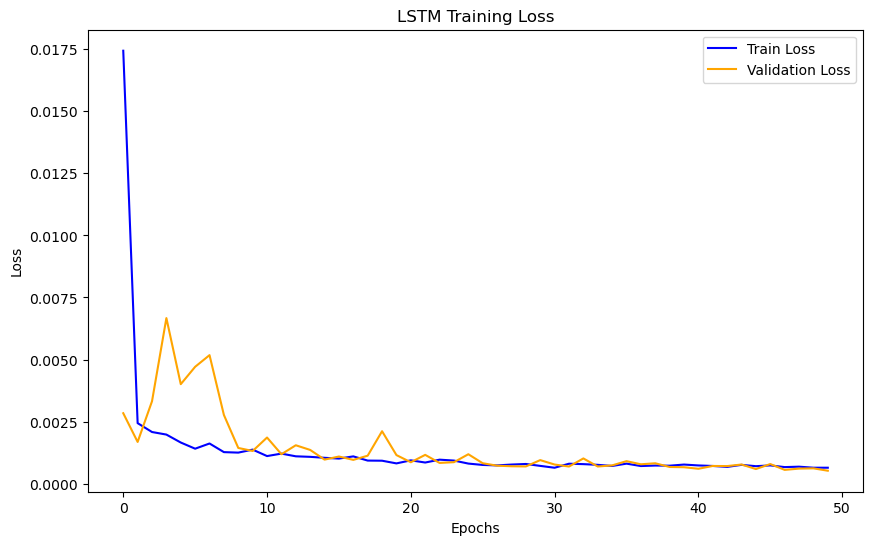

In [170]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**LSTM Model Training Insights** 

**1. Loss Curve Analysis**
- **Train Loss (Blue Line)**
  - Starts high but **rapidly decreases** within the first few epochs.
  - Becomes stable and remains consistently low after ~10 epochs.
  
- **Validation Loss (Orange Line)**
  - Shows **fluctuations** initially but stabilizes over time.
  - Minor spikes indicate **some variance in validation performance**, but there’s no extreme overfitting.

**2. Observations**
- **Model is Learning Well** – The train loss is consistently decreasing, indicating that the model is optimizing correctly.  
- **No Severe Overfitting** – Train and validation loss remain close to each other, meaning the model generalizes well.  
- The model is well-trained with no major overfitting issues.

---

**Evaluate Model Performance**

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Mean Absolute Error (MAE): 3.013985798214578
Root Mean Squared Error (RMSE): 4.0369219009978545
R-squared (R²): 0.9807579290652068


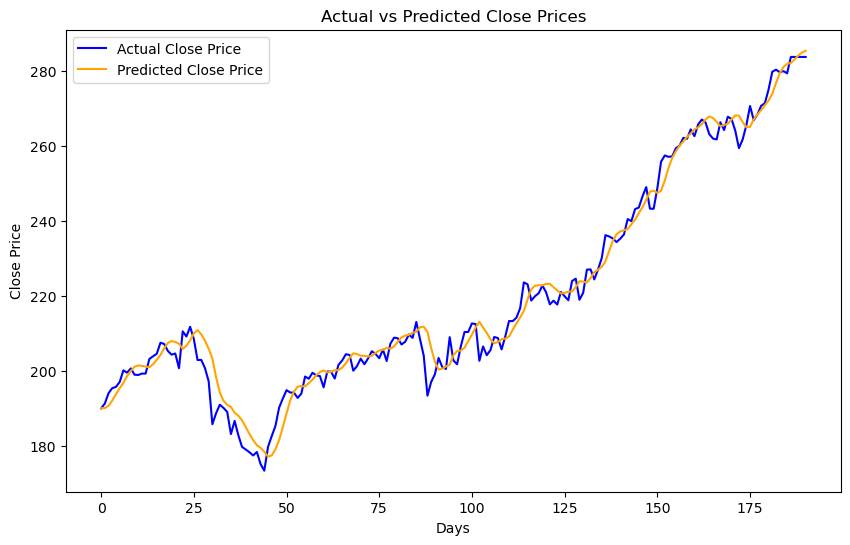

In [173]:
# Predict on test data
predictions = lstm_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)) 

# Evaluate the model
lstm_mae = mean_absolute_error(y_test_rescaled, predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
lstm_r2 = r2_score(y_test_rescaled, predictions)

print(f"\033[1mMean Absolute Error (MAE):\033[0m {lstm_mae}")
print(f"\033[1mRoot Mean Squared Error (RMSE):\033[0m {lstm_rmse}")
print(f"\033[1mR-squared (R²):\033[0m {lstm_r2}")

# Plot actual vs predicted close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(predictions, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()


**Insights and Observations from LSTM Model Evaluation**

**1. Evaluation Metrics:**
- **Mean Absolute Error (MAE):** **3.013**  
  - This is the average absolute difference between actual and predicted stock prices. A lower MAE indicates better model performance.
- **Root Mean Squared Error (RMSE):** **4.036**  
  - RMSE penalizes larger errors more than MAE, providing insight into prediction accuracy. A lower value is better.
- **R-squared (R²):** **0.980**  
  - This is an excellent score, indicating that **98.0% of the variance in stock prices is explained by the model.**  

**2. Actual vs Predicted Graph Analysis:**
- **Strong Alignment:** The **predicted stock prices (orange line)** closely follow the **actual prices (blue line)**, confirming that the model is learning the patterns effectively.
- **Smooth Predictions:** The LSTM model smooths out noise while still capturing the key upward and downward trends.
- **Minor Deviations:** There are a few instances where the model slightly underpredicts sharp spikes or dips, but overall, it generalizes well.

**Conclusion:**
The **LSTM model performed exceptionally well**, with:
- **Low error rates (MAE & RMSE)**
- **A strong R² score (0.980)**
- Good alignment between **actual and predicted stock prices**  
- LSTM appears to be the **best model so far** for stock price prediction.

---

**Choose Best Model**


=== Model Performance Comparison ===

           Model         MAE        RMSE         R2
0          ARIMA   50.878127   60.552967  -2.185996
1         SARIMA  207.786404  210.553241 -37.521061
2        Prophet   27.326171   30.065477   0.214564
3        XGBoost    7.940157   16.344173   0.767887
4  Random Forest    8.666849   17.123544   0.745222
5           LSTM    3.013986    4.036922   0.980758


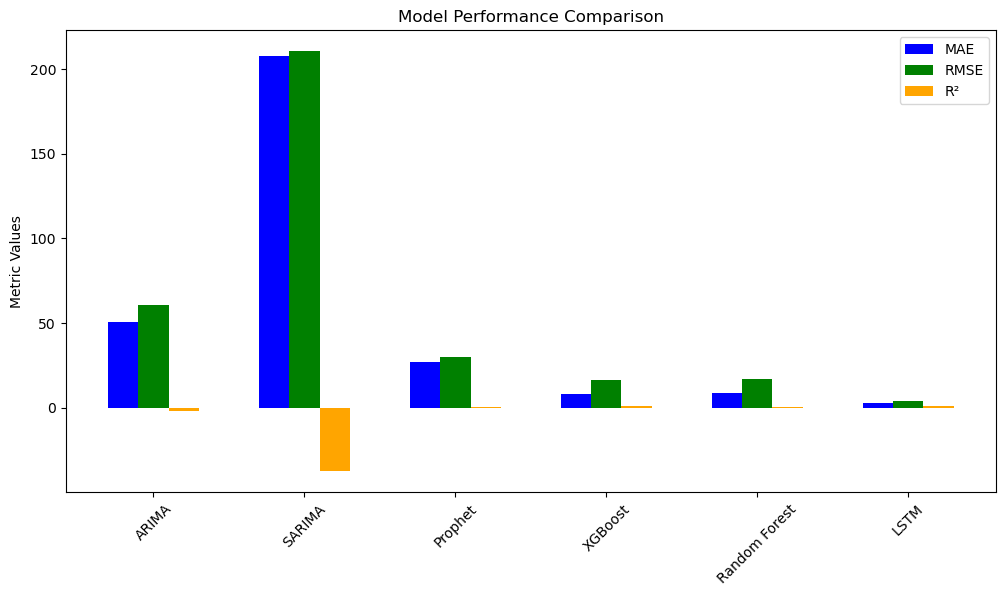

The best model is LSTM.



In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the model performance dictionary with actual variables
model_performance = {
    "ARIMA": {"MAE": arima_mae, "RMSE": arima_rmse, "R2": arima_r2},
    "SARIMA": {"MAE": sarima_mae, "RMSE": sarima_rmse, "R2": sarima_r2},
    "Prophet": {"MAE": prophet_mae, "RMSE": prophet_rmse, "R2": prophet_r2},
    "XGBoost": {"MAE": xgb_mae, "RMSE": xgb_rmse, "R2": xgb_r2},
    "Random Forest": {"MAE": rf_mae, "RMSE": rf_rmse, "R2": rf_r2},
    "LSTM": {"MAE": lstm_mae, "RMSE": lstm_rmse, "R2": lstm_r2}
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(model_performance, orient="index").reset_index()
results_df.rename(columns={"index": "Model"}, inplace=True)

# Display the dataframe
print("\n=== Model Performance Comparison ===\n")
print(results_df)

# Save results for reference
results_df.to_csv("model_performance_comparison.csv", index=False)

# Plot the updated performance comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df["Model"]))

ax.bar(x - 0.2, results_df["MAE"], width=0.2, label="MAE", color='blue')
ax.bar(x, results_df["RMSE"], width=0.2, label="RMSE", color='green')
ax.bar(x + 0.2, results_df["R2"], width=0.2, label="R²", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"])
ax.set_ylabel("Metric Values")
ax.set_title("Model Performance Comparison")
ax.legend()
plt.xticks(rotation=45)
plt.show()

# Determine the best model using a combined scoring function:
# Lower MAE and RMSE are better → Normalize and take negative values
# Higher R² is better → Normalize as is
results_df["MAE_Score"] = (results_df["MAE"] - results_df["MAE"].min()) / (results_df["MAE"].max() - results_df["MAE"].min())
results_df["RMSE_Score"] = (results_df["RMSE"] - results_df["RMSE"].min()) / (results_df["RMSE"].max() - results_df["RMSE"].min())
results_df["R2_Score"] = (results_df["R2"] - results_df["R2"].min()) / (results_df["R2"].max() - results_df["R2"].min())

# Combined score (giving equal weight to each metric)
results_df["Final_Score"] = (-results_df["MAE_Score"] - results_df["RMSE_Score"] + results_df["R2_Score"])

# Selecting the model with the highest final score
best_model = results_df.loc[results_df["Final_Score"].idxmax(), "Model"]

# Show the best model
print(f"\033[1mThe best model is {best_model}.\033[0m\n")


**Forecast Next 30 Days**


Forecasting next 30 days with LSTM
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━

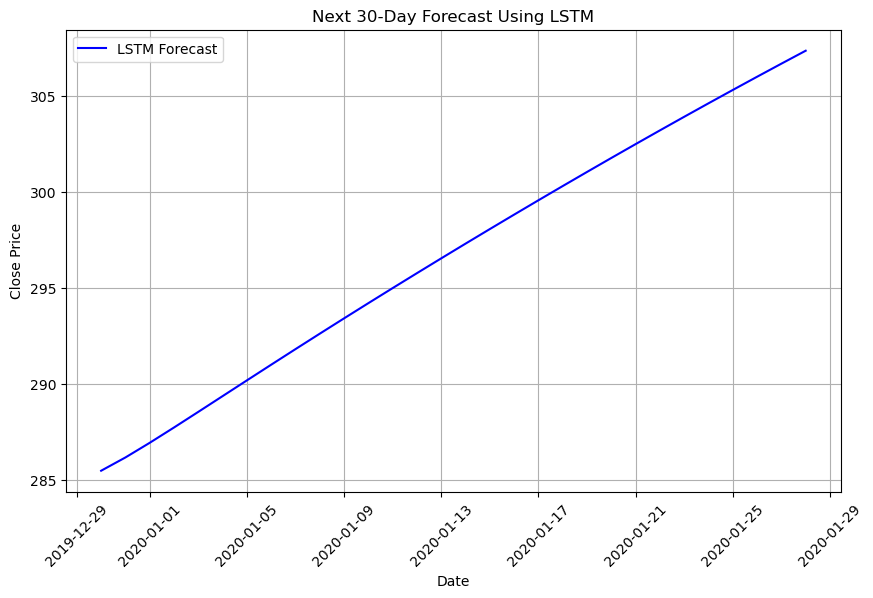

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map the Best Model to Its Trained Object
model_objects = {
    "LSTM": lstm_model,
    "Prophet": prophet_model,
    "ARIMA": arima_model,
    "SARIMA": sarima_model,
    "XGBoost": xgboost_model,
    "Random Forest": rf_model
}

# Ensure best_model is defined before proceeding
if "best_model" not in globals():
    raise NameError("Error: 'best_model' is not defined. Ensure model selection was performed correctly.")

# Retrieve the best model object
selected_model = model_objects[best_model]

# Generate future dates correctly (starting from the last test set date)
future_dates = pd.date_range(start=test.index[-1], periods=31, freq='D')[1:]

# Step 2: Forecast the Next 30 Days Using the Best Model
if best_model == "LSTM":
    print("\n\033[1mForecasting next 30 days with LSTM\033[0m")
    
    # Generate future dates for LSTM
    future_dates = pd.date_range(start=test['ds'].max(), periods=30, freq='D')
    
    # Extract the last available sequence from the training data
    last_sequence = X_test[-1]  
    
    # Reshape it to match LSTM input shape (1, sequence_length, features)
    X_future = np.expand_dims(last_sequence, axis=0)
    
    # Empty list to store predictions
    future_predictions = []

    for _ in range(30):  
        prediction = selected_model.predict(X_future)  
        future_predictions.append(prediction[0][0])  
        
        # Append prediction and remove the oldest time step (rolling window)
        X_future = np.roll(X_future, shift=-1, axis=1)
        X_future[0, -1, 0] = prediction  

    # Convert predictions back to original scale
    future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Store results in a DataFrame
    future_forecast_df = pd.DataFrame({'Date': future_dates, 'LSTM_Forecast': future_predictions_rescaled.flatten()})

    print(future_forecast_df)

elif best_model == "Prophet":
    print("\n\033[1mForecasting next 30 days with Prophet\033[0m")
    
    # Generate future DataFrame for Prophet
    future = selected_model.make_future_dataframe(periods=30, freq='D')
    
    # Predict next 30 days
    forecast = selected_model.predict(future)
    
    # Extract only future forecast values
    future_forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

elif best_model in ["ARIMA", "SARIMA"]:
    print(f"\n\033[1mForecasting next 30 days with {best_model}\033[0m")
    
    # Forecast next 30 days
    forecast_values = selected_model.forecast(steps=30)

    # Store results in DataFrame
    future_forecast_df = pd.DataFrame({'Date': future_dates, f'{best_model}_Forecast': forecast_values})

elif best_model in ["XGBoost", "Random Forest"]:
    print(f"\n\033[1mForecasting next 30 days with {best_model}\033[0m")

    # Prepare input features (use last row and roll forward)
    last_features = X_test.iloc[-1].values.reshape(1, -1)  

    future_predictions = []
    
    for _ in range(30):  
        prediction = selected_model.predict(last_features)  
        future_predictions.append(prediction[0])  

        # Shift features forward
        last_features = np.roll(last_features, shift=-1, axis=1)
        last_features[0, -1] = prediction  

    # Store results in DataFrame
    future_forecast_df = pd.DataFrame({'Date': future_dates, f'{best_model}_Forecast': future_predictions})

# Step 3: Visualize Future Forecast
plt.figure(figsize=(10, 6))
if best_model == "LSTM":
    plt.plot(future_forecast_df['Date'], future_forecast_df['LSTM_Forecast'], label="LSTM Forecast", color="blue")
elif best_model == "Prophet":
    plt.plot(future_forecast_df['ds'], future_forecast_df['yhat'], label="Prophet Forecast", color="green")
    plt.fill_between(
        future_forecast_df['ds'], 
        future_forecast_df['yhat_lower'], 
        future_forecast_df['yhat_upper'], 
        color="green", alpha=0.2, label="Confidence Interval"
    )
else:
    plt.plot(future_forecast_df['Date'], future_forecast_df.iloc[:, 1], label=f"{best_model} Forecast", color="red")

plt.title(f"Next 30-Day Forecast Using {best_model}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

# # Display Forecasted Data
# print("\n\033[1mForecasted Stock Prices for Next 30 Days:\033[0m")
# print(future_forecast_df) 


In [179]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# Save the scaler correctly
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [180]:
from tensorflow.keras.models import load_model

# Save the trained LSTM model
lstm_model.save('lstm_model.h5')

# Load the saved LSTM model
lstm_model = load_model('lstm_model.h5')
